In [1]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)

2022-03-29 11:05:42.311550: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Input parameter
train_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Train'
val_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Test'
model_weights_file = '/home/poornima/Data/GDPS/Signature_Recognition_GDPS_SGD_Novel-FINAL.hdf5'
nb_epochs = 300
print("Input parameters are assigned")



Input parameters are assigned


In [3]:
SIGNATURE_CLASSES = ['001', '002', '003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055',
                     '056','057','058','059','060','061','062','063','064','065','066','067','068','069', '070','071','072','073','074','075','076','077','078','079', '080','081','082','083','084','085','086','087','088','089', '090', '091','092','093','094','095','096','097','098','099', '100','101' ,'102' ,'103' ,'104' ,'105' ,'106' ,'107' ,'108' ,'109' ,'110' ,'111' ,'112' ,'113' ,'114' ,'115' ,'116' ,'117' ,'118' ,'119' ,'120' ,'121' ,'122' ,'123' ,'124' ,'125' ,'126' ,'127' ,'128' ,'129' ,'130' ,'131' ,'132' ,'133' ,'134' ,'135' ,'136' ,'137' ,'138' ,'139' ,'140' ,'141' ,'142' ,'143' ,'144' ,'145' ,'146' ,'147' ,'148' ,'149' ,'150' ,'151' ,'152' ,'153' ,'154' ,'155' ,'156' ,'157' ,'158' ,'159' ,'160' ,'161' ,'162' ,'163' ,'164' ,'165' ,'166' ,'167' ,'168' ,'169' ,'170' ,'171' ,'172' ,'173' ,'174' ,'175' ,'176' ,'177' ,'178' ,'179' ,'180' ,'181' ,'182' ,'183' ,'184' ,'185' ,'186' ,'187' ,'188' ,'189' ,'190' ,'191' ,'192' ,'193' ,'194' ,'195' ,'196' ,'197' ,'198' ,'199' ,'200' ,'201' ,'202' ,'203' ,'204' ,'205' ,'206' ,'207' ,'208' ,'209' ,'210' ,'211' ,'212' ,'213' ,'214' ,'215' ,'216' ,'217' ,'218' ,'219' ,'220' ,'221' ,'222' ,'223' ,'224' ,'225' ,'226' ,'227' ,'228' ,'229' ,'230' ,'231' ,'232' ,'233' ,'234' ,'235' ,'236' ,'237' ,'238' ,'239' ,'240' ,'241' ,'242' ,'243' ,'244' ,'245' ,'246' ,'247' ,'248' ,'249' ,'250' ,'251' ,'252' ,'253' ,'254' ,'255' ,'256' ,'257' ,'258' ,'259' ,'260' ,'261' ,'262' ,'263' ,'264' ,'265' ,'266' ,'267' ,'268' ,'269' ,'270' ,'271' ,'272' ,'273' ,'274' ,'275' ,'276' ,'277' ,'278' ,'279' ,'280' ,'281' ,'282' ,'283' ,'284' ,'285' ,'286' ,'287' ,'288' ,'289' ,'290' ,'291' ,'292' ,'293' ,'294' ,'295' ,'296' ,'297' ,'298' ,'299' ,'300' ,'301' ,'302' ,'303' ,'304' ,'305' ,'306' ,'307' ,'308' ,'309' ,'310' ,'311' ,'312' ,'313' ,'314' ,'315' ,'316' ,'317' ,'318' ,'319' ,'320' ,'321' ,'322' ,'323' ,'324' ,'325' ,'326' ,'327' ,'328' ,'329' ,'330' ,'331' ,'332' ,'333' ,'334' ,'335' ,'336' ,'337' ,'338' ,'339' ,'340' ,'341' ,'342' ,'343' ,'344' ,'345' ,'346' ,'347' ,'348' ,'349' ,'350' ,'351' ,'352' ,'353' ,'354' ,'355' ,'356' ,'357' ,'358' ,'359' ,'360' ,'361' ,'362' ,'363' ,'364' ,'365' ,'366' ,'367' ,'368' ,'369' ,'370' ,'371' ,'372' ,'373' ,'374' ,'375' ,'376' ,'377' ,'378' ,'379' ,'380' ,'381' ,'382' ,'383' ,'384' ,'385' ,'386' ,'387' ,'388' ,'389' ,'390' ,'391' ,'392' ,'393' ,'394' ,'395' ,'396' ,'397' ,'398' ,'399' ,'400' ,'401' ,'402' ,'403' ,'404' ,'405' ,'406' ,'407' ,'408' ,'409' ,'410' ,'411' ,'412' ,'413' ,'414' ,'415' ,'416' ,'417' ,'418' ,'419' ,'420' ,'421' ,'422' ,'423' ,'424' ,'425' ,'426' ,'427' ,'428' ,'429' ,'430' ,'431' ,'432' ,'433' ,'434' ,'435' ,'436' ,'437' ,'438' ,'439' ,'440' ,'441' ,'442' ,'443' ,'444' ,'445' ,'446' ,'447' ,'448' ,'449' ,'450' ,'451' ,'452' ,'453' ,'454' ,'455' ,'456' ,'457' ,'458' ,'459' ,'460' ,'461' ,'462' ,'463' ,'464' ,'465' ,'466' ,'467' ,'468' ,'469' ,'470' ,'471' ,'472' ,'473' ,'474' ,'475' ,'476' ,'477' ,'478' ,'479' ,'480' ,'481' ,'482' ,'483' ,'484' ,'485' ,'486' ,'487' ,'488' ,'489' ,'490' ,'491' ,'492' ,'493' ,'494' ,'495' ,'496' ,'497' ,'498' ,'499' ,'500' ,'501' ,'502' ,'503' ,'504' ,'505' ,'506' ,'507' ,'508' ,'509' ,'510' ,'511' ,'512' ,'513' ,'514' ,'515' ,'516' ,'517' ,'518' ,'519' ,'520' ,'521' ,'522' ,'523' ,'524' ,'525' ,'526' ,'527' ,'528' ,'529' ,'530' ,'531' ,'532' ,'533' ,'534' ,'535' ,'536' ,'537' ,'538' ,'539' ,'540' ,'541' ,'542' ,'543' ,'544' ,'545' ,'546' ,'547' ,'548' ,'549' ,'550' ,'551' ,'552' ,'553' ,'554' ,'555' ,'556' ,'557' ,'558' ,'559' ,'560' ,'561' ,'562' ,'563' ,'564' ,'565' ,'566' ,'567' ,'568' ,'569' ,'570' ,'571' ,'572' ,'573' ,'574' ,'575' ,'576' ,'577' ,'578' ,'579' ,'580' ,'581' ,'582' ,'583' ,'584' ,'585' ,'586' ,'587' ,'588' ,'589' ,'590' ,'591' ,'592' ,'593' ,'594' ,'595' ,'596' ,'597' ,'598' ,'599' ,'600' ,'601' ,'602' ,'603' ,'604' ,'605' ,'606' ,'607' ,'608' ,'609' ,'610' ,'611' ,'612' ,'613' ,'614' ,'615' ,'616' ,'617' ,'618' ,'619' ,'620' ,'621' ,'622' ,'623' ,'624' ,'625' ,'626' ,'627' ,'628' ,'629' ,'630' ,'631' ,'632' ,'633' ,'634' ,'635' ,'636' ,'637' ,'638' ,'639' ,'640' ,'641' ,'642' ,'643' ,'644' ,'645' ,'646' ,'647' ,'648' ,'649' ,'650' ,'651' ,'652' ,'653' ,'654' ,'655' ,'656' ,'657' ,'658' ,'659' ,'660' ,'661' ,'662' ,'663' ,'664' ,'665' ,'666' ,'667' ,'668' ,'669' ,'670' ,'671' ,'672' ,'673' ,'674' ,'675' ,'676' ,'677' ,'678' ,'679' ,'680' ,'681' ,'682' ,'683' ,'684' ,'685' ,'686' ,'687' ,'688' ,'689' ,'690' ,'691' ,'692' ,'693' ,'694' ,'695' ,'696' ,'697' ,'698' ,'699' ,'700' ,'701' ,'702' ,'703' ,'704' ,'705' ,'706' ,'707' ,'708' ,'709' ,'710' ,'711' ,'712' ,'713' ,'714' ,'715' ,'716' ,'717' ,'718' ,'719' ,'720' ,'721' ,'722' ,'723' ,'724' ,'725' ,'726' ,'727' ,'728' ,'729' ,'730' ,'731' ,'732' ,'733' ,'734' ,'735' ,'736' ,'737' ,'738' ,'739' ,'740' ,'741' ,'742' ,'743' ,'744' ,'745' ,'746' ,'747' ,'748' ,'749' ,'750' ,'751' ,'752' ,'753' ,'754' ,'755' ,'756' ,'757' ,'758' ,'759' ,'760' ,'761' ,'762' ,'763' ,'764' ,'765' ,'766' ,'767' ,'768' ,'769' ,'770' ,'771' ,'772' ,'773' ,'774' ,'775' ,'776' ,'777' ,'778' ,'779' ,'780' ,'781' ,'782' ,'783' ,'784' ,'785' ,'786' ,'787' ,'788' ,'789' ,'790' ,'791' ,'792' ,'793' ,'794' ,'795' ,'796' ,'797' ,'798' ,'799' ,'800' ,'801' ,'802' ,'803' ,'804' ,'805' ,'806' ,'807' ,'808' ,'809' ,'810' ,'811' ,'812' ,'813' ,'814' ,'815' ,'816' ,'817' ,'818' ,'819' ,'820' ,'821' ,'822' ,'823' ,'824' ,'825' ,'826' ,'827' ,'828' ,'829' ,'830' ,'831' ,'832' ,'833' ,'834' ,'835' ,'836' ,'837' ,'838' ,'839' ,'840' ,'841' ,'842' ,'843' ,'844' ,'845' ,'846' ,'847' ,'848' ,'849' ,'850' ,'851' ,'852' ,'853' ,'854' ,'855' ,'856' ,'857' ,'858' ,'859' ,'860' ,'861' ,'862' ,'863' ,'864' ,'865' ,'866' ,'867' ,'868' ,'869' ,'870' ,'871' ,'872' ,'873' ,'874' ,'875' ,'876' ,'877' ,'878' ,'879' ,'880' ,'881' ,'882' ,'883' ,'884' ,'885' ,'886' ,'887' ,'888' ,'889' ,'890' ,'891' ,'892' ,'893' ,'894' ,'895' ,'896' ,'897' ,'898' ,'899' ,'900' ,'901' ,'902' ,'903' ,'904' ,'905' ,'906' ,'907' ,'908' ,'909' ,'910' ,'911' ,'912' ,'913' ,'914' ,'915' ,'916' ,'917' ,'918' ,'919' ,'920' ,'921' ,'922' ,'923' ,'924' ,'925' ,'926' ,'927' ,'928' ,'929' ,'930' ,'931' ,'932' ,'933' ,'934' ,'935' ,'936' ,'937' ,'938' ,'939' ,'940' ,'941' ,'942' ,'943' ,'944' ,'945' ,'946' ,'947' ,'948' ,'949' ,'950' ,'951' ,'952' ,'953' ,'954' ,'955' ,'956' ,'957' ,'958' ,'959' ,'960' ,'961' ,'962' ,'963' ,'964' ,'965' ,'966' ,'967' ,'968' ,'969' ,'970' ,'971' ,'972' ,'973' ,'974' ,'975' ,'976' ,'977' ,'978' ,'979' ,'980' ,'981' ,'982' ,'983' ,'984' ,'985' ,'986' ,'987' ,'988' ,'989' ,'990' ,'991' ,'992' ,'993' ,'994' ,'995' ,'996' ,'997' ,'998' ,'999' ,'1000' ,'1001' ,'1002' ,'1003' ,'1004' ,'1005' ,'1006' ,'1007' ,'1008' ,'1009' ,'1010' ,'1011' ,'1012' ,'1013' ,'1014' ,'1015' ,'1016' ,'1017' ,'1018' ,'1019' ,'1020' ,'1021' ,'1022' ,'1023' ,'1024' ,'1025' ,'1026' ,'1027' ,'1028' ,'1029' ,'1030' ,'1031' ,'1032' ,'1033' ,'1034' ,'1035' ,'1036' ,'1037' ,'1038' ,'1039' ,'1040' ,'1041' ,'1042' ,'1043' ,'1044' ,'1045' ,'1046' ,'1047' ,'1048' ,'1049' ,'1050' ,'1051' ,'1052' ,'1053' ,'1054' ,'1055' ,'1056' ,'1057' ,'1058' ,'1059' ,'1060' ,'1061' ,'1062' ,'1063' ,'1064' ,'1065' ,'1066' ,'1067' ,'1068' ,'1069' ,'1070' ,'1071' ,'1072' ,'1073' ,'1074' ,'1075' ,'1076' ,'1077' ,'1078' ,'1079' ,'1080' ,'1081' ,'1082' ,'1083' ,'1084' ,'1085' ,'1086' ,'1087' ,'1088' ,'1089' ,'1090' ,'1091' ,'1092' ,'1093' ,'1094' ,'1095' ,'1096' ,'1097' ,'1098' ,'1099' ,'1100' ,'1101' ,'1102' ,'1103' ,'1104' ,'1105' ,'1106' ,'1107' ,'1108' ,'1109' ,'1110' ,'1111' ,'1112' ,'1113' ,'1114' ,'1115' ,'1116' ,'1117' ,'1118' ,'1119' ,'1120' ,'1121' ,'1122' ,'1123' ,'1124' ,'1125' ,'1126' ,'1127' ,'1128' ,'1129' ,'1130' ,'1131' ,'1132' ,'1133' ,'1134' ,'1135' ,'1136' ,'1137' ,'1138' ,'1139' ,'1140' ,'1141' ,'1142' ,'1143' ,'1144' ,'1145' ,'1146' ,'1147' ,'1148' ,'1149' ,'1150' ,'1151' ,'1152' ,'1153' ,'1154' ,'1155' ,'1156' ,'1157' ,'1158' ,'1159' ,'1160' ,'1161' ,'1162' ,'1163' ,'1164' ,'1165' ,'1166' ,'1167' ,'1168' ,'1169' ,'1170' ,'1171' ,'1172' ,'1173' ,'1174' ,'1175' ,'1176' ,'1177' ,'1178' ,'1179' ,'1180' ,'1181' ,'1182' ,'1183' ,'1184' ,'1185' ,'1186' ,'1187' ,'1188' ,'1189' ,'1190' ,'1191' ,'1192' ,'1193' ,'1194' ,'1195' ,'1196' ,'1197' ,'1198' ,'1199' ,'1200' ,'1201' ,'1202' ,'1203' ,'1204' ,'1205' ,'1206' ,'1207' ,'1208' ,'1209' ,'1210' ,'1211' ,'1212' ,'1213' ,'1214' ,'1215' ,'1216' ,'1217' ,'1218' ,'1219' ,'1220' ,'1221' ,'1222' ,'1223' ,'1224' ,'1225' ,'1226' ,'1227' ,'1228' ,'1229' ,'1230' ,'1231' ,'1232' ,'1233' ,'1234' ,'1235' ,'1236' ,'1237' ,'1238' ,'1239' ,'1240' ,'1241' ,'1242' ,'1243' ,'1244' ,'1245' ,'1246' ,'1247' ,'1248' ,'1249' ,'1250' ,'1251' ,'1252' ,'1253' ,'1254' ,'1255' ,'1256' ,'1257' ,'1258' ,'1259' ,'1260' ,'1261' ,'1262' ,'1263' ,'1264' ,'1265' ,'1266' ,'1267' ,'1268' ,'1269' ,'1270' ,'1271' ,'1272' ,'1273' ,'1274' ,'1275' ,'1276' ,'1277' ,'1278' ,'1279' ,'1280' ,'1281' ,'1282' ,'1283' ,'1284' ,'1285' ,'1286' ,'1287' ,'1288' ,'1289' ,'1290' ,'1291' ,'1292' ,'1293' ,'1294' ,'1295' ,'1296' ,'1297' ,'1298' ,'1299' ,'1300' ,'1301' ,'1302' ,'1303' ,'1304' ,'1305' ,'1306' ,'1307' ,'1308' ,'1309' ,'1310' ,'1311' ,'1312' ,'1313' ,'1314' ,'1315' ,'1316' ,'1317' ,'1318' ,'1319' ,'1320' ,'1321' ,'1322' ,'1323' ,'1324' ,'1325' ,'1326' ,'1327' ,'1328' ,'1329' ,'1330' ,'1331' ,'1332' ,'1333' ,'1334' ,'1335' ,'1336' ,'1337' ,'1338' ,'1339' ,'1340' ,'1341' ,'1342' ,'1343' ,'1344' ,'1345' ,'1346' ,'1347' ,'1348' ,'1349' ,'1350' ,'1351' ,'1352' ,'1353' ,'1354' ,'1355' ,'1356' ,'1357' ,'1358' ,'1359' ,'1360' ,'1361' ,'1362' ,'1363' ,'1364' ,'1365' ,'1366' ,'1367' ,'1368' ,'1369' ,'1370' ,'1371' ,'1372' ,'1373' ,'1374' ,'1375' ,'1376' ,'1377' ,'1378' ,'1379' ,'1380' ,'1381' ,'1382' ,'1383' ,'1384' ,'1385' ,'1386' ,'1387' ,'1388' ,'1389' ,'1390' ,'1391' ,'1392' ,'1393' ,'1394' ,'1395' ,'1396' ,'1397' ,'1398' ,'1399' ,'1400' ,'1401' ,'1402' ,'1403' ,'1404' ,'1405' ,'1406' ,'1407' ,'1408' ,'1409' ,'1410' ,'1411' ,'1412' ,'1413' ,'1414' ,'1415' ,'1416' ,'1417' ,'1418' ,'1419' ,'1420' ,'1421' ,'1422' ,'1423' ,'1424' ,'1425' ,'1426' ,'1427' ,'1428' ,'1429' ,'1430' ,'1431' ,'1432' ,'1433' ,'1434' ,'1435' ,'1436' ,'1437' ,'1438' ,'1439' ,'1440' ,'1441' ,'1442' ,'1443' ,'1444' ,'1445' ,'1446' ,'1447' ,'1448' ,'1449' ,'1450' ,'1451' ,'1452' ,'1453' ,'1454' ,'1455' ,'1456' ,'1457' ,'1458' ,'1459' ,'1460' ,'1461' ,'1462' ,'1463' ,'1464' ,'1465' ,'1466' ,'1467' ,'1468' ,'1469' ,'1470' ,'1471' ,'1472' ,'1473' ,'1474' ,'1475' ,'1476' ,'1477' ,'1478' ,'1479' ,'1480' ,'1481' ,'1482' ,'1483' ,'1484' ,'1485' ,'1486' ,'1487' ,'1488' ,'1489' ,'1490' ,'1491' ,'1492' ,'1493' ,'1494' ,'1495' ,'1496' ,'1497' ,'1498' ,'1499' ,'1500' ,'1501' ,'1502' ,'1503' ,'1504' ,'1505' ,'1506' ,'1507' ,'1508' ,'1509' ,'1510' ,'1511' ,'1512' ,'1513' ,'1514' ,'1515' ,'1516' ,'1517' ,'1518' ,'1519' ,'1520' ,'1521' ,'1522' ,'1523' ,'1524' ,'1525' ,'1526' ,'1527' ,'1528' ,'1529' ,'1530' ,'1531' ,'1532' ,'1533' ,'1534' ,'1535' ,'1536' ,'1537' ,'1538' ,'1539' ,'1540' ,'1541' ,'1542' ,'1543' ,'1544' ,'1545' ,'1546' ,'1547' ,'1548' ,'1549' ,'1550' ,'1551' ,'1552' ,'1553' ,'1554' ,'1555' ,'1556' ,'1557' ,'1558' ,'1559' ,'1560' ,'1561' ,'1562' ,'1563' ,'1564' ,'1565' ,'1566' ,'1567' ,'1568' ,'1569' ,'1570' ,'1571' ,'1572' ,'1573' ,'1574' ,'1575' ,'1576' ,'1577' ,'1578' ,'1579' ,'1580' ,'1581' ,'1582' ,'1583' ,'1584' ,'1585' ,'1586' ,'1587' ,'1588' ,'1589' ,'1590' ,'1591' ,'1592' ,'1593' ,'1594' ,'1595' ,'1596' ,'1597' ,'1598' ,'1599' ,'1600' ,'1601' ,'1602' ,'1603' ,'1604' ,'1605' ,'1606' ,'1607' ,'1608' ,'1609' ,'1610' ,'1611' ,'1612' ,'1613' ,'1614' ,'1615' ,'1616' ,'1617' ,'1618' ,'1619' ,'1620' ,'1621' ,'1622' ,'1623' ,'1624' ,'1625' ,'1626' ,'1627' ,'1628' ,'1629' ,'1630' ,'1631' ,'1632' ,'1633' ,'1634' ,'1635' ,'1636' ,'1637' ,'1638' ,'1639' ,'1640' ,'1641' ,'1642' ,'1643' ,'1644' ,'1645' ,'1646' ,'1647' ,'1648' ,'1649' ,'1650' ,'1651' ,'1652' ,'1653' ,'1654' ,'1655' ,'1656' ,'1657' ,'1658' ,'1659' ,'1660' ,'1661' ,'1662' ,'1663' ,'1664' ,'1665' ,'1666' ,'1667' ,'1668' ,'1669' ,'1670' ,'1671' ,'1672' ,'1673' ,'1674' ,'1675' ,'1676' ,'1677' ,'1678' ,'1679' ,'1680' ,'1681' ,'1682' ,'1683' ,'1684' ,'1685' ,'1686' ,'1687' ,'1688' ,'1689' ,'1690' ,'1691' ,'1692' ,'1693' ,'1694' ,'1695' ,'1696' ,'1697' ,'1698' ,'1699' ,'1700' ,'1701' ,'1702' ,'1703' ,'1704' ,'1705' ,'1706' ,'1707' ,'1708' ,'1709' ,'1710' ,'1711' ,'1712' ,'1713' ,'1714' ,'1715' ,'1716' ,'1717' ,'1718' ,'1719' ,'1720' ,'1721' ,'1722' ,'1723' ,'1724' ,'1725' ,'1726' ,'1727' ,'1728' ,'1729' ,'1730' ,'1731' ,'1732' ,'1733' ,'1734' ,'1735' ,'1736' ,'1737' ,'1738' ,'1739' ,'1740' ,'1741' ,'1742' ,'1743' ,'1744' ,'1745' ,'1746' ,'1747' ,'1748' ,'1749' ,'1750' ,'1751' ,'1752' ,'1753' ,'1754' ,'1755' ,'1756' ,'1757' ,'1758' ,'1759' ,'1760' ,'1761' ,'1762' ,'1763' ,'1764' ,'1765' ,'1766' ,'1767' ,'1768' ,'1769' ,'1770' ,'1771' ,'1772' ,'1773' ,'1774' ,'1775' ,'1776' ,'1777' ,'1778' ,'1779' ,'1780' ,'1781' ,'1782' ,'1783' ,'1784' ,'1785' ,'1786' ,'1787' ,'1788' ,'1789' ,'1790' ,'1791' ,'1792' ,'1793' ,'1794' ,'1795' ,'1796' ,'1797' ,'1798' ,'1799' ,'1800' ,'1801' ,'1802' ,'1803' ,'1804' ,'1805' ,'1806' ,'1807' ,'1808' ,'1809' ,'1810' ,'1811' ,'1812' ,'1813' ,'1814' ,'1815' ,'1816' ,'1817' ,'1818' ,'1819' ,'1820' ,'1821' ,'1822' ,'1823' ,'1824' ,'1825' ,'1826' ,'1827' ,'1828' ,'1829' ,'1830' ,'1831' ,'1832' ,'1833' ,'1834' ,'1835' ,'1836' ,'1837' ,'1838' ,'1839' ,'1840' ,'1841' ,'1842' ,'1843' ,'1844' ,'1845' ,'1846' ,'1847' ,'1848' ,'1849' ,'1850' ,'1851' ,'1852' ,'1853' ,'1854' ,'1855' ,'1856' ,'1857' ,'1858' ,'1859' ,'1860' ,'1861' ,'1862' ,'1863' ,'1864' ,'1865' ,'1866' ,'1867' ,'1868' ,'1869' ,'1870' ,'1871' ,'1872' ,'1873' ,'1874' ,'1875' ,'1876' ,'1877' ,'1878' ,'1879' ,'1880' ,'1881' ,'1882' ,'1883' ,'1884' ,'1885' ,'1886' ,'1887' ,'1888' ,'1889' ,'1890' ,'1891' ,'1892' ,'1893' ,'1894' ,'1895' ,'1896' ,'1897' ,'1898' ,'1899' ,'1900' ,'1901' ,'1902' ,'1903' ,'1904' ,'1905' ,'1906' ,'1907' ,'1908' ,'1909' ,'1910' ,'1911' ,'1912' ,'1913' ,'1914' ,'1915' ,'1916' ,'1917' ,'1918' ,'1919' ,'1920' ,'1921' ,'1922' ,'1923' ,'1924' ,'1925' ,'1926' ,'1927' ,'1928' ,'1929' ,'1930' ,'1931' ,'1932' ,'1933' ,'1934' ,'1935' ,'1936' ,'1937' ,'1938' ,'1939' ,'1940' ,'1941' ,'1942' ,'1943' ,'1944' ,'1945' ,'1946' ,'1947' ,'1948' ,'1949' ,'1950' ,'1951' ,'1952' ,'1953' ,'1954' ,'1955' ,'1956' ,'1957' ,'1958' ,'1959' ,'1960' ,'1961' ,'1962' ,'1963' ,'1964' ,'1965' ,'1966' ,'1967' ,'1968' ,'1969' ,'1970' ,'1971' ,'1972' ,'1973' ,'1974' ,'1975' ,'1976' ,'1977' ,'1978' ,'1979' ,'1980' ,'1981' ,'1982' ,'1983' ,'1984' ,'1985' ,'1986' ,'1987' ,'1988' ,'1989' ,'1990' ,'1991' ,'1992' ,'1993' ,'1994' ,'1995' ,'1996' ,'1997' ,'1998' ,'1999' ,'2000' ,'2001' ,'2002' ,'2003' ,'2004' ,'2005' ,'2006' ,'2007' ,'2008' ,'2009' ,'2010' ,'2011' ,'2012' ,'2013' ,'2014' ,'2015' ,'2016' ,'2017' ,'2018' ,'2019' ,'2020' ,'2021' ,'2022' ,'2023' ,'2024' ,'2025' ,'2026' ,'2027' ,'2028' ,'2029' ,'2030' ,'2031' ,'2032' ,'2033' ,'2034' ,'2035' ,'2036' ,'2037' ,'2038' ,'2039' ,'2040' ,'2041' ,'2042' ,'2043' ,'2044' ,'2045' ,'2046' ,'2047' ,'2048' ,'2049' ,'2050' ,'2051' ,'2052' ,'2053' ,'2054' ,'2055' ,'2056' ,'2057' ,'2058' ,'2059' ,'2060' ,'2061' ,'2062' ,'2063' ,'2064' ,'2065' ,'2066' ,'2067' ,'2068' ,'2069' ,'2070' ,'2071' ,'2072' ,'2073' ,'2074' ,'2075' ,'2076' ,'2077' ,'2078' ,'2079' ,'2080' ,'2081' ,'2082' ,'2083' ,'2084' ,'2085' ,'2086' ,'2087' ,'2088' ,'2089' ,'2090' ,'2091' ,'2092' ,'2093' ,'2094' ,'2095' ,'2096' ,'2097' ,'2098' ,'2099' ,'2100' ,'2101' ,'2102' ,'2103' ,'2104' ,'2105' ,'2106' ,'2107' ,'2108' ,'2109' ,'2110' ,'2111' ,'2112' ,'2113' ,'2114' ,'2115' ,'2116' ,'2117' ,'2118' ,'2119' ,'2120' ,'2121' ,'2122' ,'2123' ,'2124' ,'2125' ,'2126' ,'2127' ,'2128' ,'2129' ,'2130' ,'2131' ,'2132' ,'2133' ,'2134' ,'2135' ,'2136' ,'2137' ,'2138' ,'2139' ,'2140' ,'2141' ,'2142' ,'2143' ,'2144' ,'2145' ,'2146' ,'2147' ,'2148' ,'2149' ,'2150' ,'2151' ,'2152' ,'2153' ,'2154' ,'2155' ,'2156' ,'2157' ,'2158' ,'2159' ,'2160' ,'2161' ,'2162' ,'2163' ,'2164' ,'2165' ,'2166' ,'2167' ,'2168' ,'2169' ,'2170' ,'2171' ,'2172' ,'2173' ,'2174' ,'2175' ,'2176' ,'2177' ,'2178' ,'2179' ,'2180' ,'2181' ,'2182' ,'2183' ,'2184' ,'2185' ,'2186' ,'2187' ,'2188' ,'2189' ,'2190' ,'2191' ,'2192' ,'2193' ,'2194' ,'2195' ,'2196' ,'2197' ,'2198' ,'2199' ,'2200' ,'2201' ,'2202' ,'2203' ,'2204' ,'2205' ,'2206' ,'2207' ,'2208' ,'2209' ,'2210' ,'2211' ,'2212' ,'2213' ,'2214' ,'2215' ,'2216' ,'2217' ,'2218' ,'2219' ,'2220' ,'2221' ,'2222' ,'2223' ,'2224' ,'2225' ,'2226' ,'2227' ,'2228' ,'2229' ,'2230' ,'2231' ,'2232' ,'2233' ,'2234' ,'2235' ,'2236' ,'2237' ,'2238' ,'2239' ,'2240' ,'2241' ,'2242' ,'2243' ,'2244' ,'2245' ,'2246' ,'2247' ,'2248' ,'2249' ,'2250' ,'2251' ,'2252' ,'2253' ,'2254' ,'2255' ,
                     '2256' ,'2257' ,'2258' ,'2259' ,'2260' ,'2261' ,'2262' ,'2263' ,'2264' ,'2265' ,'2266' ,'2267' ,'2268' ,'2269' ,'2270' ,'2271' ,'2272' ,'2273' ,'2274' ,'2275' ,'2276' ,'2277' ,'2278' ,'2279' ,'2280' ,'2281' ,'2282' ,'2283' ,'2284' ,'2285' ,'2286' ,'2287' ,'2288' ,'2289' ,'2290' ,'2291' ,'2292' ,'2293' ,'2294' ,'2295' ,'2296' ,'2297' ,'2298' ,'2299' ,'2300' ,'2301' ,'2302' ,'2303' ,'2304' ,'2305' ,'2306' ,'2307' ,'2308' ,'2309' ,'2310' ,'2311' ,'2312' ,'2313' ,'2314' ,'2315' ,'2316' ,'2317' ,'2318' ,'2319' ,'2320' ,'2321' ,'2322' ,'2323' ,'2324' ,'2325' ,'2326' ,'2327' ,'2328' ,'2329' ,'2330' ,'2331' ,'2332' ,'2333' ,'2334' ,'2335' ,'2336' ,'2337' ,'2338' ,'2339' ,'2340' ,'2341' ,'2342' ,'2343' ,'2344' ,'2345' ,'2346' ,'2347' ,'2348' ,'2349' ,'2350' ,'2351' ,'2352' ,'2353' ,'2354' ,'2355' ,'2356' ,'2357' ,'2358' ,'2359' ,'2360' ,'2361' ,'2362' ,'2363' ,'2364' ,'2365' ,'2366' ,'2367' ,'2368' ,'2369' ,'2370' ,'2371' ,'2372' ,'2373' ,'2374' ,'2375' ,'2376' ,'2377' ,'2378' ,'2379' ,'2380' ,'2381' ,'2382' ,'2383' ,'2384' ,'2385' ,'2386' ,'2387' ,'2388' ,'2389' ,'2390' ,'2391' ,'2392' ,'2393' ,'2394' ,'2395' ,'2396' ,'2397' ,'2398' ,'2399' ,'2400' ,'2401' ,'2402' ,'2403' ,'2404' ,'2405' ,'2406' ,'2407' ,'2408' ,'2409' ,'2410' ,'2411' ,'2412' ,'2413' ,'2414' ,'2415' ,'2416' ,'2417' ,'2418' ,'2419' ,'2420' ,'2421' ,'2422' ,'2423' ,'2424' ,'2425' ,'2426' ,'2427' ,'2428' ,'2429' ,'2430' ,'2431' ,'2432' ,'2433' ,'2434' ,'2435' ,'2436' ,'2437' ,'2438' ,'2439' ,'2440' ,'2441' ,'2442' ,'2443' ,'2444' ,'2445' ,'2446' ,'2447' ,'2448' ,'2449' ,'2450' ,'2451' ,'2452' ,'2453' ,'2454' ,'2455' ,'2456' ,'2457' ,'2458' ,'2459' ,'2460' ,'2461' ,'2462' ,'2463' ,'2464' ,'2465' ,'2466' ,'2467' ,'2468' ,'2469' ,'2470' ,'2471' ,'2472' ,'2473' ,'2474' ,'2475' ,'2476' ,'2477' ,'2478' ,'2479' ,'2480' ,'2481' ,'2482' ,'2483' ,'2484' ,'2485' ,'2486' ,'2487' ,'2488' ,'2489' ,'2490' ,'2491' ,'2492' ,'2493' ,'2494' ,'2495' ,'2496' ,'2497' ,'2498' ,'2499' ,'2500' ,'2501' ,'2502' ,'2503' ,'2504' ,'2505' ,'2506' ,'2507' ,'2508' ,'2509' ,'2510' ,'2511' ,'2512' ,'2513' ,'2514' ,'2515' ,'2516' ,'2517' ,'2518' ,'2519' ,'2520' ,'2521' ,'2522' ,'2523' ,'2524' ,'2525' ,'2526' ,'2527' ,'2528' ,'2529' ,'2530' ,'2531' ,'2532' ,'2533' ,'2534' ,'2535' ,'2536' ,'2537' ,'2538' ,'2539' ,'2540' ,'2541' ,'2542' ,'2543' ,'2544' ,'2545' ,'2546' ,'2547' ,'2548' ,'2549' ,'2550' ,'2551' ,'2552' ,'2553' ,'2554' ,'2555' ,'2556' ,'2557' ,'2558' ,'2559' ,'2560' ,'2561' ,'2562' ,'2563' ,'2564' ,'2565' ,'2566' ,'2567' ,'2568' ,'2569' ,'2570' ,'2571' ,'2572' ,'2573' ,'2574' ,'2575' ,'2576' ,'2577' ,'2578' ,'2579' ,'2580' ,'2581' ,'2582' ,'2583' ,'2584' ,'2585' ,'2586' ,'2587' ,'2588' ,'2589' ,'2590' ,'2591' ,'2592' ,'2593' ,'2594' ,'2595' ,'2596' ,'2597' ,'2598' ,'2599' ,'2600' ,'2601' ,'2602' ,'2603' ,'2604' ,'2605' ,'2606' ,'2607' ,'2608' ,'2609' ,'2610' ,'2611' ,'2612' ,'2613' ,'2614' ,'2615' ,'2616' ,'2617' ,'2618' ,'2619' ,'2620' ,'2621' ,'2622' ,'2623' ,'2624' ,'2625' ,'2626' ,'2627' ,'2628' ,'2629' ,'2630' ,'2631' ,'2632' ,'2633' ,'2634' ,'2635' ,'2636' ,'2637' ,'2638' ,'2639' ,'2640' ,'2641' ,'2642' ,'2643' ,'2644' ,'2645' ,'2646' ,'2647' ,'2648' ,'2649' ,'2650' ,'2651' ,'2652' ,'2653' ,'2654' ,'2655' ,'2656' ,'2657' ,'2658' ,'2659' ,'2660' ,'2661' ,'2662' ,'2663' ,'2664' ,'2665' ,'2666' ,'2667' ,'2668' ,'2669' ,'2670' ,'2671' ,'2672' ,'2673' ,'2674' ,'2675' ,'2676' ,'2677' ,'2678' ,'2679' ,'2680' ,'2681' ,'2682' ,'2683' ,'2684' ,'2685' ,'2686' ,'2687' ,'2688' ,'2689' ,'2690' ,'2691' ,'2692' ,'2693' ,'2694' ,'2695' ,'2696' ,'2697' ,'2698' ,'2699' ,'2700' ,'2701' ,'2702' ,'2703' ,'2704' ,'2705' ,'2706' ,'2707' ,'2708' ,'2709' ,'2710' ,'2711' ,'2712' ,'2713' ,'2714' ,'2715' ,'2716' ,'2717' ,'2718' ,'2719' ,'2720' ,'2721' ,'2722' ,'2723' ,'2724' ,'2725' ,'2726' ,'2727' ,'2728' ,'2729' ,'2730' ,'2731' ,'2732' ,'2733' ,'2734' ,'2735' ,'2736' ,'2737' ,'2738' ,'2739' ,'2740' ,'2741' ,'2742' ,'2743' ,'2744' ,'2745' ,'2746' ,'2747' ,'2748' ,'2749' ,'2750' ,'2751' ,'2752' ,'2753' ,'2754' ,'2755' ,'2756' ,'2757' ,'2758' ,'2759' ,'2760' ,'2761' ,'2762' ,'2763' ,'2764' ,'2765' ,'2766' ,'2767' ,'2768' ,'2769' ,'2770' ,'2771' ,'2772' ,'2773' ,'2774' ,'2775' ,'2776' ,'2777' ,'2778' ,'2779' ,'2780' ,'2781' ,'2782' ,'2783' ,'2784' ,'2785' ,'2786' ,'2787' ,'2788' ,'2789' ,'2790' ,'2791' ,'2792' ,'2793' ,'2794' ,'2795' ,'2796' ,'2797' ,'2798' ,'2799' ,'2800' ,'2801' ,'2802' ,'2803' ,'2804' ,'2805' ,'2806' ,'2807' ,'2808' ,'2809' ,'2810' ,'2811' ,'2812' ,'2813' ,'2814' ,'2815' ,'2816' ,'2817' ,'2818' ,'2819' ,'2820' ,'2821' ,'2822' ,'2823' ,'2824' ,'2825' ,'2826' ,'2827' ,'2828' ,'2829' ,'2830' ,'2831' ,'2832' ,'2833' ,'2834' ,'2835' ,'2836' ,'2837' ,'2838' ,'2839' ,'2840' ,'2841' ,'2842' ,'2843' ,'2844' ,'2845' ,'2846' ,'2847' ,'2848' ,'2849' ,'2850' ,'2851' ,'2852' ,'2853' ,'2854' ,'2855' ,'2856' ,'2857' ,'2858' ,'2859' ,'2860' ,'2861' ,'2862' ,'2863' ,'2864' ,'2865' ,'2866' ,'2867' ,'2868' ,'2869' ,'2870' ,'2871' ,'2872' ,'2873' ,'2874' ,'2875' ,'2876' ,'2877' ,'2878' ,'2879' ,'2880' ,'2881' ,'2882' ,'2883' ,'2884' ,'2885' ,'2886' ,'2887' ,'2888' ,'2889' ,'2890' ,'2891' ,'2892' ,'2893' ,'2894' ,'2895' ,'2896' ,'2897' ,'2898' ,'2899' ,'2900' ,'2901' ,'2902' ,'2903' ,'2904' ,'2905' ,'2906' ,'2907' ,'2908' ,'2909' ,'2910' ,'2911' ,'2912' ,'2913' ,'2914' ,'2915' ,'2916' ,'2917' ,'2918' ,'2919' ,'2920' ,'2921' ,'2922' ,'2923' ,'2924' ,'2925' ,'2926' ,'2927' ,'2928' ,'2929' ,'2930' ,'2931' ,'2932' ,'2933' ,'2934' ,'2935' ,'2936' ,'2937' ,'2938' ,'2939' ,'2940' ,'2941' ,'2942' ,'2943' ,'2944' ,'2945' ,'2946' ,'2947' ,'2948' ,'2949' ,'2950' ,'2951' ,'2952' ,'2953' ,'2954' ,'2955' ,'2956' ,'2957' ,'2958' ,'2959' ,'2960' ,'2961' ,'2962' ,'2963' ,'2964' ,'2965' ,'2966' ,'2967' ,'2968' ,'2969' ,'2970' ,'2971' ,'2972' ,'2973' ,'2974' ,'2975' ,'2976' ,'2977' ,'2978' ,'2979' ,'2980' ,'2981' ,'2982' ,'2983' ,'2984' ,'2985' ,'2986' ,'2987' ,'2988' ,'2989' ,'2990' ,'2991' ,'2992' ,'2993' ,'2994' ,'2995' ,'2996' ,'2997' ,'2998' ,'2999' ,'3000' ,'3001' ,'3002' ,'3003' ,'3004' ,'3005' ,'3006' ,'3007' ,'3008' ,'3009' ,'3010' ,'3011' ,'3012' ,'3013' ,'3014' ,'3015' ,'3016' ,'3017' ,'3018' ,'3019' ,'3020' ,'3021' ,'3022' ,'3023' ,'3024' ,'3025' ,'3026' ,'3027' ,'3028' ,'3029' ,'3030' ,'3031' ,'3032' ,'3033' ,'3034' ,'3035' ,'3036' ,'3037' ,'3038' ,'3039' ,'3040' ,'3041' ,'3042' ,'3043' ,'3044' ,'3045' ,'3046' ,'3047' ,'3048' ,'3049' ,'3050' ,'3051' ,'3052' ,'3053' ,'3054' ,'3055' ,'3056' ,'3057' ,'3058' ,'3059' ,'3060' ,'3061' ,'3062' ,'3063' ,'3064' ,'3065' ,'3066' ,'3067' ,'3068' ,'3069' ,'3070' ,'3071' ,'3072' ,'3073' ,'3074' ,'3075' ,'3076' ,'3077' ,'3078' ,'3079' ,'3080' ,'3081' ,'3082' ,'3083' ,'3084' ,'3085' ,'3086' ,'3087' ,'3088' ,'3089' ,'3090' ,'3091' ,'3092' ,'3093' ,'3094' ,'3095' ,'3096' ,'3097' ,'3098' ,'3099' ,'3100' ,'3101' ,'3102' ,'3103' ,'3104' ,'3105' ,'3106' ,'3107' ,'3108' ,'3109' ,'3110' ,'3111' ,'3112' ,'3113' ,'3114' ,'3115' ,'3116' ,'3117' ,'3118' ,'3119' ,'3120' ,'3121' ,'3122' ,'3123' ,'3124' ,'3125' ,'3126' ,'3127' ,'3128' ,'3129' ,'3130' ,'3131' ,'3132' ,'3133' ,'3134' ,'3135' ,'3136' ,'3137' ,'3138' ,'3139' ,'3140' ,'3141' ,'3142' ,'3143' ,'3144' ,'3145' ,'3146' ,'3147' ,'3148' ,'3149' ,'3150' ,'3151' ,'3152' ,'3153' ,'3154' ,'3155' ,'3156' ,'3157' ,'3158' ,'3159' ,'3160' ,'3161' ,'3162' ,'3163' ,'3164' ,'3165' ,'3166' ,'3167' ,'3168' ,'3169' ,'3170' ,'3171' ,'3172' ,'3173' ,'3174' ,'3175' ,'3176' ,'3177' ,'3178' ,'3179' ,'3180' ,'3181' ,'3182' ,'3183' ,'3184' ,'3185' ,'3186' ,'3187' ,'3188' ,'3189' ,'3190' ,'3191' ,'3192' ,'3193' ,'3194' ,'3195' ,'3196' ,'3197' ,'3198' ,'3199' ,'3200' ,'3201' ,'3202' ,'3203' ,'3204' ,'3205' ,'3206' ,'3207' ,'3208' ,'3209' ,'3210' ,'3211' ,'3212' ,'3213' ,'3214' ,'3215' ,'3216' ,'3217' ,'3218' ,'3219' ,'3220' ,'3221' ,'3222' ,'3223' ,'3224' ,'3225' ,'3226' ,'3227' ,'3228' ,'3229' ,'3230' ,'3231' ,'3232' ,'3233' ,'3234' ,'3235' ,'3236' ,'3237' ,'3238' ,'3239' ,'3240' ,'3241' ,'3242' ,'3243' ,'3244' ,'3245' ,'3246' ,'3247' ,'3248' ,'3249' ,'3250' ,'3251' ,'3252' ,'3253' ,'3254' ,'3255' ,'3256' ,'3257' ,'3258' ,'3259' ,'3260' ,'3261' ,'3262' ,'3263' ,'3264' ,'3265' ,'3266' ,'3267' ,'3268' ,'3269' ,'3270' ,'3271' ,'3272' ,'3273' ,'3274' ,'3275' ,'3276' ,'3277' ,'3278' ,'3279' ,'3280' ,'3281' ,'3282' ,'3283' ,'3284' ,'3285' ,'3286' ,'3287' ,'3288' ,'3289' ,'3290' ,'3291' ,'3292' ,'3293' ,'3294' ,'3295' ,'3296' ,'3297' ,'3298' ,
                     '3299' ,'3300' ,'3301' ,'3302' ,'3303' ,'3304' ,'3305' ,'3306' ,'3307' ,'3308' ,'3309' ,'3310' ,'3311' ,'3312' ,'3313' ,'3314' ,'3315' ,'3316' ,'3317' ,'3318' ,'3319' ,'3320' ,'3321' ,'3322' ,'3323' ,'3324' ,'3325' ,'3326' ,'3327' ,'3328' ,'3329' ,'3330' ,'3331' ,'3332' ,'3333' ,'3334' ,'3335' ,'3336' ,'3337' ,'3338' ,'3339' ,'3340' ,'3341' ,'3342' ,'3343' ,'3344' ,'3345' ,'3346' ,'3347' ,'3348' ,'3349' ,'3350' ,'3351' ,'3352' ,'3353' ,'3354' ,'3355' ,'3356' ,'3357' ,'3358' ,'3359' ,'3360' ,'3361' ,'3362' ,'3363' ,'3364' ,'3365' ,'3366' ,'3367' ,'3368' ,'3369' ,'3370' ,'3371' ,'3372' ,'3373' ,'3374' ,'3375' ,'3376' ,'3377' ,'3378' ,'3379' ,
                     '3380' ,'3381' ,'3382' ,'3383' ,'3384' ,'3385' ,'3386' ,'3387' ,'3388' ,'3389' ,'3390' ,'3391' ,'3392' ,'3393' ,'3394' ,'3395' ,'3396' ,'3397' ,'3398' ,'3399' ,'3400' ,'3401' ,'3402' ,'3403' ,'3404' ,'3405' ,'3406' ,'3407' ,'3408' ,'3409' ,'3410' ,'3411' ,'3412' ,'3413' ,'3414' ,'3415' ,'3416' ,'3417' ,'3418' ,'3419' ,'3420' ,'3421' ,'3422' ,'3423' ,'3424' ,'3425' ,'3426' ,'3427' ,'3428' ,'3429' ,'3430' ,'3431' ,'3432' ,'3433' ,'3434' ,'3435' ,'3436' ,'3437' ,'3438' ,'3439' ,'3440' ,'3441' ,'3442' ,'3443' ,'3444' ,'3445' ,'3446' ,'3447' ,'3448' ,'3449' ,'3450' ,'3451' ,'3452' ,'3453' ,'3454' ,'3455' ,'3456' ,'3457' ,'3458' ,'3459' ,'3460' ,'3461' ,'3462' ,'3463' ,'3464' ,'3465' ,'3466' ,'3467' ,'3468' ,'3469' ,'3470' ,'3471' ,'3472' ,'3473' ,'3474' ,'3475' ,'3476' ,'3477' ,'3478' ,'3479' ,'3480' ,'3481' ,'3482' ,'3483' ,'3484' ,'3485' ,'3486' ,'3487' ,'3488' ,'3489' ,'3490' ,'3491' ,'3492' ,'3493' ,'3494' ,'3495' ,'3496' ,'3497' ,'3498' ,'3499' ,'3500' ,'3501' ,'3502' ,'3503' ,'3504' ,'3505' ,'3506' ,'3507' ,'3508' ,'3509' ,'3510' ,'3511' ,'3512' ,'3513' ,'3514' ,'3515' ,'3516' ,'3517' ,'3518' ,'3519' ,'3520' ,'3521' ,'3522' ,'3523' ,'3524' ,'3525' ,'3526' ,'3527' ,'3528' ,'3529' ,'3530' ,'3531' ,'3532' ,'3533' ,'3534' ,'3535' ,'3536' ,'3537' ,'3538' ,'3539' ,'3540' ,'3541' ,'3542' ,'3543' ,'3544' ,'3545' ,'3546' ,'3547' ,'3548' ,'3549' ,'3550' ,'3551' ,'3552' ,'3553' ,'3554' ,'3555' ,'3556' ,'3557' ,'3558' ,'3559' ,'3560' ,'3561' ,'3562' ,'3563' ,'3564' ,'3565' ,'3566' ,'3567' ,'3568' ,'3569' ,'3570' ,'3571' ,'3572' ,'3573' ,'3574' ,'3575' ,'3576' ,'3577' ,'3578' ,'3579' ,'3580' ,'3581' ,'3582' ,'3583' ,'3584' ,'3585' ,'3586' ,'3587' ,'3588' ,'3589' ,'3590' ,'3591' ,'3592' ,'3593' ,'3594' ,'3595' ,'3596' ,'3597' ,'3598' ,'3599' ,'3600' ,'3601' ,'3602' ,'3603' ,'3604' ,'3605' ,'3606' ,'3607' ,'3608' ,'3609' ,'3610' ,'3611' ,'3612' ,'3613' ,'3614' ,'3615' ,'3616' ,'3617' ,'3618' ,'3619' ,'3620' ,'3621' ,'3622' ,'3623' ,'3624' ,'3625' ,'3626' ,'3627' ,'3628' ,'3629' ,'3630' ,'3631' ,'3632' ,'3633' ,'3634' ,'3635' ,'3636' ,'3637' ,'3638' ,'3639' ,'3640' ,'3641' ,'3642' ,'3643' ,'3644' ,'3645' ,'3646' ,'3647' ,'3648' ,'3649' ,'3650' ,'3651' ,'3652' ,'3653' ,'3654' ,'3655' ,'3656' ,'3657' ,'3658' ,'3659' ,'3660' ,'3661' ,'3662' ,'3663' ,'3664' ,'3665' ,'3666' ,'3667' ,'3668' ,'3669' ,'3670' ,'3671' ,'3672' ,'3673' ,'3674' ,'3675' ,'3676' ,'3677' ,'3678' ,'3679' ,'3680' ,'3681' ,'3682' ,'3683' ,'3684' ,'3685' ,'3686' ,'3687' ,'3688' ,'3689' ,'3690' ,'3691' ,'3692' ,'3693' ,'3694' ,'3695' ,'3696' ,'3697' ,'3698' ,'3699' ,'3700' ,'3701' ,'3702' ,'3703' ,'3704' ,'3705' ,'3706' ,'3707' ,'3708' ,'3709' ,'3710' ,'3711' ,'3712' ,'3713' ,'3714' ,'3715' ,'3716' ,'3717' ,'3718' ,'3719' ,'3720' ,'3721' ,'3722' ,'3723' ,'3724' ,'3725' ,'3726' ,'3727' ,'3728' ,'3729' ,'3730' ,'3731' ,'3732' ,'3733' ,'3734' ,'3735' ,'3736' ,'3737' ,'3738' ,'3739' ,'3740' ,'3741' ,'3742' ,'3743' ,'3744' ,'3745' ,'3746' ,'3747' ,'3748' ,'3749' ,'3750' ,'3751' ,'3752' ,'3753' ,'3754' ,'3755' ,'3756' ,'3757' ,'3758' ,'3759' ,'3760' ,'3761' ,'3762' ,'3763' ,'3764' ,'3765' ,'3766' ,'3767' ,'3768' ,'3769' ,'3770' ,'3771' ,'3772' ,'3773' ,'3774' ,'3775' ,'3776' ,'3777' ,'3778' ,'3779' ,'3780' ,'3781' ,'3782' ,'3783' ,'3784' ,'3785' ,'3786' ,'3787' ,'3788' ,'3789' ,'3790' ,'3791' ,'3792' ,'3793' ,'3794' ,'3795' ,'3796' ,'3797' ,'3798' ,'3799' ,'3800' ,'3801' ,'3802' ,'3803' ,'3804' ,'3805' ,'3806' ,'3807' ,'3808' ,'3809' ,'3810' ,'3811' ,'3812' ,'3813' ,'3814' ,'3815' ,'3816' ,'3817' ,'3818' ,'3819' ,'3820' ,'3821' ,'3822' ,'3823' ,'3824' ,'3825' ,'3826' ,'3827' ,'3828' ,'3829' ,'3830' ,'3831' ,'3832' ,'3833' ,'3834' ,'3835' ,'3836' ,'3837' ,'3838' ,'3839' ,'3840' ,'3841' ,'3842' ,'3843' ,'3844' ,'3845' ,'3846' ,'3847' ,'3848' ,'3849' ,'3850' ,'3851' ,'3852' ,'3853' ,'3854' ,'3855' ,'3856' ,'3857' ,'3858' ,'3859' ,'3860' ,'3861' ,'3862' ,'3863' ,'3864' ,'3865' ,'3866' ,'3867' ,'3868' ,'3869' ,'3870' ,'3871' ,'3872' ,'3873' ,'3874' ,'3875' ,'3876' ,'3877' ,'3878' ,'3879' ,'3880' ,'3881' ,'3882' ,'3883' ,'3884' ,'3885' ,'3886' ,'3887' ,'3888' ,'3889' ,'3890' ,'3891' ,'3892' ,'3893' ,'3894' ,'3895' ,'3896' ,'3897' ,'3898' ,'3899' ,'3900' ,'3901' ,'3902' ,'3903' ,'3904' ,'3905' ,'3906' ,'3907' ,'3908' ,'3909' ,'3910' ,'3911' ,'3912' ,'3913' ,'3914' ,'3915' ,'3916' ,'3917' ,'3918' ,'3919' ,'3920' ,'3921' ,'3922' ,'3923' ,'3924' ,'3925' ,'3926' ,'3927' ,'3928' ,'3929' ,'3930' ,'3931' ,'3932' ,'3933' ,'3934' ,'3935' ,'3936' ,'3937' ,'3938' ,'3939' ,'3940' ,'3941' ,'3942' ,'3943' ,'3944' ,'3945' ,'3946' ,'3947' ,'3948' ,'3949' ,'3950' ,'3951' ,'3952' ,'3953' ,'3954' ,'3955' ,'3956' ,'3957' ,'3958' ,'3959' ,'3960' ,'3961' ,'3962' ,'3963' ,'3964' ,'3965' ,'3966' ,'3967' ,'3968' ,'3969' ,'3970' ,'3971' ,'3972' ,'3973' ,'3974' ,'3975' ,'3976' ,'3977' ,'3978' ,'3979' ,'3980' ,'3981' ,'3982' ,'3983' ,'3984' ,'3985' ,'3986' ,'3987' ,'3988' ,'3989' ,'3990' ,'3991' ,'3992' ,'3993' ,'3994' ,'3995' ,'3996' ,'3997' ,'3998' ,'3999' ,'4000']

In [4]:
# image data generation
train_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Train'
val_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Test'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), 
                                                    batch_size=32,shuffle=True, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), 
                                                    batch_size=32,shuffle=True,class_mode='categorical')

Found 76000 images belonging to 4000 classes.
Found 20000 images belonging to 4000 classes.


In [5]:
#Load the pretrained Network
#vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height,img_width,3), pooling=None, classes=1000)

vgg16_model=tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                             weights='imagenet')
print("pretrained Network is loaded")

2022-03-29 11:06:03.545748: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-29 11:06:03.546792: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-29 11:06:03.579267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-03-29 11:06:03.579317: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-29 11:06:03.582658: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-29 11:06:03.582739: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

pretrained Network is loaded


In [6]:
# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False
print("Pretrained layers are freezed")

Pretrained layers are freezed


In [7]:
from tensorflow.keras.models import Sequential
model=Sequential()
print("Model created")

Model created


In [8]:
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
hidden_layer=model.add(Dense(4096, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(4096, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(4000, activation='softmax', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [10]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = '/home/poornima/Data/GDPS/Signature_Recognition-VGG16-{epoch:02d}-{val_accuracy:.2f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=150, verbose=1, mode='auto')

In [11]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2022-03-29 11:07:09.830245: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-03-29 11:07:09.830337: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-29 11:07:09.830395: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-29 11:07:09.830424: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-03-29 11:07:09.830449: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-03-29 11:07:09.830475: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so

In [12]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(train_generator, epochs=400, validation_data=validation_generator, callbacks=[checkpoint,early])

print('Training Completed!')

2022-03-29 11:07:16.659291: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-29 11:07:16.661605: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/400


2022-03-29 11:07:17.248009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-29 11:07:17.626909: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-03-29 11:07:18.779883: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-03-29 11:07:18.905652: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2375/2375 [==============================] - 889s 367ms/step - loss: 8.3006 - accuracy: 2.3474e-04 - val_loss: 8.2882 - val_accuracy: 3.0000e-04

Epoch 00001: val_accuracy improved from -inf to 0.00030, saving model to /home/poornima/Data/GDPS/Signature_Recognition-VGG16-01-0.00.h5
Epoch 2/400
2375/2375 [==============================] - 861s 363ms/step - loss: 8.2851 - accuracy: 5.0377e-04 - val_loss: 8.1186 - val_accuracy: 8.5000e-04

Epoch 00002: val_accuracy improved from 0.00030 to 0.00085, saving model to /home/poornima/Data/GDPS/Signature_Recognition-VGG16-02-0.00.h5
Epoch 3/400
2375/2375 [==============================] - 861s 362ms/step - loss: 7.9894 - accuracy: 7.5880e-04 - val_loss: 7.1948 - val_accuracy: 0.0046

Epoch 00003: val_accuracy improved from 0.00085 to 0.00455, saving model to /home/poornima/Data/GDPS/Signature_Recognition-VGG16-03-0.00.h5
Epoch 4/400
2375/2375 [==============================] - 864s 364ms/step - loss: 6.8228 - accuracy: 0.0096 - val_loss: 5.4457


Epoch 00031: val_accuracy improved from 0.77505 to 0.77930, saving model to /home/poornima/Data/GDPS/Signature_Recognition-VGG16-31-0.78.h5
Epoch 32/400
2375/2375 [==============================] - 861s 363ms/step - loss: 0.0778 - accuracy: 0.9753 - val_loss: 1.2144 - val_accuracy: 0.7635

Epoch 00032: val_accuracy did not improve from 0.77930
Epoch 33/400
2375/2375 [==============================] - 863s 363ms/step - loss: 0.0793 - accuracy: 0.9757 - val_loss: 1.1046 - val_accuracy: 0.7789

Epoch 00033: val_accuracy did not improve from 0.77930
Epoch 34/400
2375/2375 [==============================] - 863s 363ms/step - loss: 0.0731 - accuracy: 0.9768 - val_loss: 1.1083 - val_accuracy: 0.7826

Epoch 00034: val_accuracy improved from 0.77930 to 0.78265, saving model to /home/poornima/Data/GDPS/Signature_Recognition-VGG16-34-0.78.h5
Epoch 35/400
2375/2375 [==============================] - 862s 363ms/step - loss: 0.0682 - accuracy: 0.9782 - val_loss: 1.0468 - val_accuracy: 0.7905

Epoch

Epoch 67/400
2375/2375 [==============================] - 862s 363ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 1.1481 - val_accuracy: 0.8017

Epoch 00067: val_accuracy did not improve from 0.81135
Epoch 68/400
2375/2375 [==============================] - 862s 363ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 1.1449 - val_accuracy: 0.8055

Epoch 00068: val_accuracy did not improve from 0.81135
Epoch 69/400
2375/2375 [==============================] - 863s 363ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 1.1879 - val_accuracy: 0.8032

Epoch 00069: val_accuracy did not improve from 0.81135
Epoch 70/400
2375/2375 [==============================] - 860s 362ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 1.1208 - val_accuracy: 0.8091

Epoch 00070: val_accuracy did not improve from 0.81135
Epoch 71/400
2375/2375 [==============================] - 864s 364ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 1.1696 - val_accuracy: 0.8067

Epoch 00071: val_accuracy

2375/2375 [==============================] - 864s 364ms/step - loss: 0.0124 - accuracy: 0.9967 - val_loss: 1.1639 - val_accuracy: 0.8151

Epoch 00105: val_accuracy did not improve from 0.81970
Epoch 106/400
2375/2375 [==============================] - 861s 362ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 1.1111 - val_accuracy: 0.8212

Epoch 00106: val_accuracy improved from 0.81970 to 0.82120, saving model to /home/poornima/Data/GDPS/Signature_Recognition-VGG16-106-0.82.h5
Epoch 107/400
2375/2375 [==============================] - 858s 361ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 1.1625 - val_accuracy: 0.8159

Epoch 00107: val_accuracy did not improve from 0.82120
Epoch 108/400
2375/2375 [==============================] - 864s 364ms/step - loss: 0.0109 - accuracy: 0.9973 - val_loss: 1.1446 - val_accuracy: 0.8169

Epoch 00108: val_accuracy did not improve from 0.82120
Epoch 109/400
2375/2375 [==============================] - 863s 363ms/step - loss: 0.0084 - accuracy

2375/2375 [==============================] - 859s 362ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 1.1566 - val_accuracy: 0.8198

Epoch 00144: val_accuracy did not improve from 0.82645
Epoch 145/400
2375/2375 [==============================] - 859s 362ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 1.1642 - val_accuracy: 0.8182

Epoch 00145: val_accuracy did not improve from 0.82645
Epoch 146/400
2375/2375 [==============================] - 863s 363ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 1.1807 - val_accuracy: 0.8151

Epoch 00146: val_accuracy did not improve from 0.82645
Epoch 147/400
2375/2375 [==============================] - 861s 363ms/step - loss: 0.0073 - accuracy: 0.9981 - val_loss: 1.1668 - val_accuracy: 0.8171

Epoch 00147: val_accuracy did not improve from 0.82645
Epoch 148/400
2375/2375 [==============================] - 858s 361ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 1.1945 - val_accuracy: 0.8187

Epoch 00148: val_accuracy did not 

2375/2375 [==============================] - 858s 361ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 1.2049 - val_accuracy: 0.8209

Epoch 00183: val_accuracy did not improve from 0.82745
Epoch 184/400
2375/2375 [==============================] - 859s 362ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 1.1890 - val_accuracy: 0.8217

Epoch 00184: val_accuracy did not improve from 0.82745
Epoch 185/400
2375/2375 [==============================] - 859s 361ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 1.1937 - val_accuracy: 0.8245

Epoch 00185: val_accuracy did not improve from 0.82745
Epoch 186/400
2375/2375 [==============================] - 860s 362ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 1.2376 - val_accuracy: 0.8190

Epoch 00186: val_accuracy did not improve from 0.82745
Epoch 187/400
2375/2375 [==============================] - 865s 364ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.2313 - val_accuracy: 0.8206

Epoch 00187: val_accuracy did not 

2375/2375 [==============================] - 863s 363ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 1.2292 - val_accuracy: 0.8209

Epoch 00222: val_accuracy did not improve from 0.82840
Epoch 223/400
2375/2375 [==============================] - 860s 362ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 1.2170 - val_accuracy: 0.8224

Epoch 00223: val_accuracy did not improve from 0.82840
Epoch 224/400
2375/2375 [==============================] - 860s 362ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 1.2275 - val_accuracy: 0.8209

Epoch 00224: val_accuracy did not improve from 0.82840
Epoch 225/400
2375/2375 [==============================] - 861s 362ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.1940 - val_accuracy: 0.8252

Epoch 00225: val_accuracy did not improve from 0.82840
Epoch 226/400
2375/2375 [==============================] - 859s 362ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 1.2809 - val_accuracy: 0.8162

Epoch 00226: val_accuracy did not 

2375/2375 [==============================] - 863s 363ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 1.1927 - val_accuracy: 0.8292

Epoch 00260: val_accuracy did not improve from 0.83060
Epoch 261/400
2375/2375 [==============================] - 864s 364ms/step - loss: 5.2381e-04 - accuracy: 0.9999 - val_loss: 1.3154 - val_accuracy: 0.8127

Epoch 00261: val_accuracy did not improve from 0.83060
Epoch 262/400
2375/2375 [==============================] - 862s 363ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 1.2406 - val_accuracy: 0.8235

Epoch 00262: val_accuracy did not improve from 0.83060
Epoch 263/400
2375/2375 [==============================] - 860s 362ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.2043 - val_accuracy: 0.8279

Epoch 00263: val_accuracy did not improve from 0.83060
Epoch 264/400
2375/2375 [==============================] - 859s 362ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.2825 - val_accuracy: 0.8231

Epoch 00264: val_accuracy did 

2375/2375 [==============================] - 865s 364ms/step - loss: 8.3900e-04 - accuracy: 0.9998 - val_loss: 1.2156 - val_accuracy: 0.8271

Epoch 00299: val_accuracy did not improve from 0.83370
Epoch 300/400
2375/2375 [==============================] - 866s 365ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 1.2454 - val_accuracy: 0.8238

Epoch 00300: val_accuracy did not improve from 0.83370
Epoch 301/400
2375/2375 [==============================] - 867s 365ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 1.2081 - val_accuracy: 0.8242

Epoch 00301: val_accuracy did not improve from 0.83370
Epoch 302/400
2375/2375 [==============================] - 865s 364ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 1.2465 - val_accuracy: 0.8195

Epoch 00302: val_accuracy did not improve from 0.83370
Epoch 303/400
2375/2375 [==============================] - 865s 364ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 1.2261 - val_accuracy: 0.8228

Epoch 00303: val_accuracy did 

2375/2375 [==============================] - 858s 361ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 1.2613 - val_accuracy: 0.8177

Epoch 00338: val_accuracy did not improve from 0.83370
Epoch 339/400
2375/2375 [==============================] - 857s 361ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.1722 - val_accuracy: 0.8295

Epoch 00339: val_accuracy did not improve from 0.83370
Epoch 340/400
2375/2375 [==============================] - 859s 362ms/step - loss: 5.4532e-04 - accuracy: 0.9999 - val_loss: 1.2133 - val_accuracy: 0.8291

Epoch 00340: val_accuracy did not improve from 0.83370
Epoch 341/400
2375/2375 [==============================] - 863s 363ms/step - loss: 7.9877e-04 - accuracy: 0.9998 - val_loss: 1.2400 - val_accuracy: 0.8245

Epoch 00341: val_accuracy did not improve from 0.83370
Epoch 342/400
2375/2375 [==============================] - 860s 362ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.2596 - val_accuracy: 0.8217

Epoch 00342: val_accuracy 

2375/2375 [==============================] - 860s 362ms/step - loss: 5.6917e-04 - accuracy: 0.9998 - val_loss: 1.2717 - val_accuracy: 0.8218

Epoch 00377: val_accuracy did not improve from 0.83475
Epoch 378/400
2375/2375 [==============================] - 863s 363ms/step - loss: 7.1811e-04 - accuracy: 0.9998 - val_loss: 1.2344 - val_accuracy: 0.8288

Epoch 00378: val_accuracy did not improve from 0.83475
Epoch 379/400
2375/2375 [==============================] - 863s 363ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.1937 - val_accuracy: 0.8343

Epoch 00379: val_accuracy did not improve from 0.83475
Epoch 380/400
2375/2375 [==============================] - 860s 362ms/step - loss: 9.3472e-04 - accuracy: 0.9997 - val_loss: 1.3123 - val_accuracy: 0.8205

Epoch 00380: val_accuracy did not improve from 0.83475
Epoch 381/400
2375/2375 [==============================] - 858s 361ms/step - loss: 2.3529e-04 - accuracy: 1.0000 - val_loss: 1.1954 - val_accuracy: 0.8349

Epoch 00381: val_a

In [13]:
# save model and architecture to single file
model.save('/home/poornima/Data/GDPS/Signature_Recognition_VGG16.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
hidden_layer (Dense)         (None, 4096)              16781312  
_________________________________________________________________
classification_layer (Dense) (None, 4096)              1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


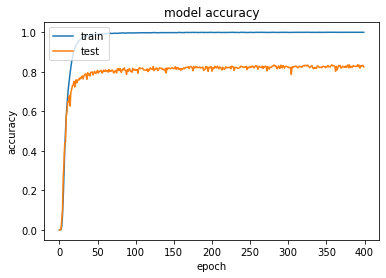

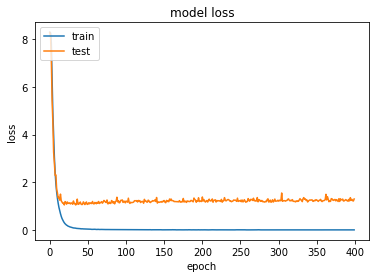

In [14]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

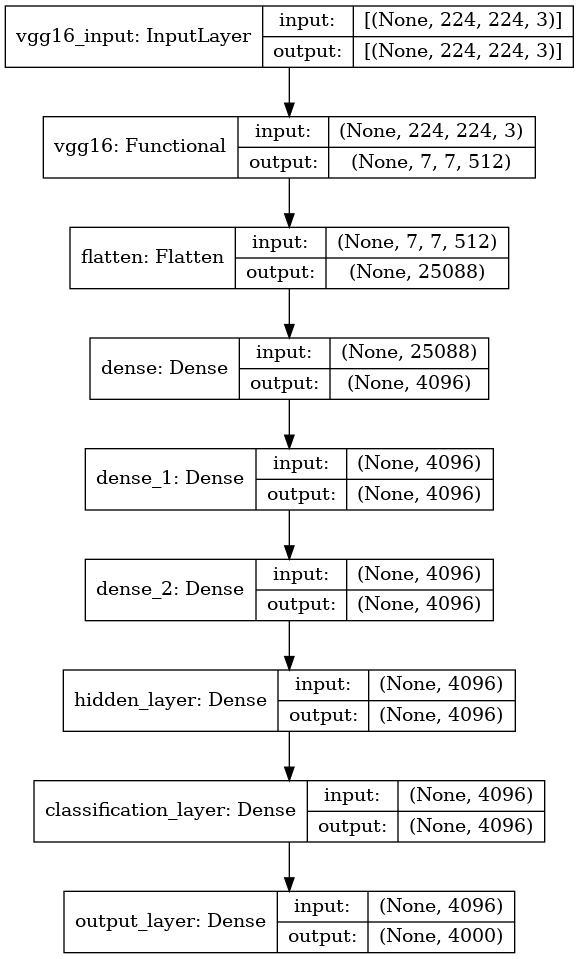

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [16]:
import os
train_data_dir ='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Train/'
def get_images(image):
    """Load files from train folder"""
    img_dir = train_data_dir+'{}'.format(image)
    images = [image+'/'+im for im in os.listdir(img_dir)]
    return images

In [17]:
files = []
y_all = []
for image in SIGNATURE_CLASSES:
    image_files = get_images(image)
    files.extend(image_files)
    
    y_image = np.tile(image, len(image_files))
    y_all.extend(y_image)
    print("{0} photos of {1}".format(len(image_files), image))
    
y_all = np.array(y_all)
print(len(files))
print(len(y_all))


19 photos of 001
19 photos of 002
19 photos of 003
19 photos of 004
19 photos of 005
19 photos of 006
19 photos of 007
19 photos of 008
19 photos of 009
19 photos of 010
19 photos of 011
19 photos of 012
19 photos of 013
19 photos of 014
19 photos of 015
19 photos of 016
19 photos of 017
19 photos of 018
19 photos of 019
19 photos of 020
19 photos of 021
19 photos of 022
19 photos of 023
19 photos of 024
19 photos of 025
19 photos of 026
19 photos of 027
19 photos of 028
19 photos of 029
19 photos of 030
19 photos of 031
19 photos of 032
19 photos of 033
19 photos of 034
19 photos of 035
19 photos of 036
19 photos of 037
19 photos of 038
19 photos of 039
19 photos of 040
19 photos of 041
19 photos of 042
19 photos of 043
19 photos of 044
19 photos of 045
19 photos of 046
19 photos of 047
19 photos of 048
19 photos of 049
19 photos of 050
19 photos of 051
19 photos of 052
19 photos of 053
19 photos of 054
19 photos of 055
19 photos of 056
19 photos of 057
19 photos of 058
19 photos of 0

19 photos of 1017
19 photos of 1018
19 photos of 1019
19 photos of 1020
19 photos of 1021
19 photos of 1022
19 photos of 1023
19 photos of 1024
19 photos of 1025
19 photos of 1026
19 photos of 1027
19 photos of 1028
19 photos of 1029
19 photos of 1030
19 photos of 1031
19 photos of 1032
19 photos of 1033
19 photos of 1034
19 photos of 1035
19 photos of 1036
19 photos of 1037
19 photos of 1038
19 photos of 1039
19 photos of 1040
19 photos of 1041
19 photos of 1042
19 photos of 1043
19 photos of 1044
19 photos of 1045
19 photos of 1046
19 photos of 1047
19 photos of 1048
19 photos of 1049
19 photos of 1050
19 photos of 1051
19 photos of 1052
19 photos of 1053
19 photos of 1054
19 photos of 1055
19 photos of 1056
19 photos of 1057
19 photos of 1058
19 photos of 1059
19 photos of 1060
19 photos of 1061
19 photos of 1062
19 photos of 1063
19 photos of 1064
19 photos of 1065
19 photos of 1066
19 photos of 1067
19 photos of 1068
19 photos of 1069
19 photos of 1070
19 photos of 1071
19 photos 

19 photos of 1735
19 photos of 1736
19 photos of 1737
19 photos of 1738
19 photos of 1739
19 photos of 1740
19 photos of 1741
19 photos of 1742
19 photos of 1743
19 photos of 1744
19 photos of 1745
19 photos of 1746
19 photos of 1747
19 photos of 1748
19 photos of 1749
19 photos of 1750
19 photos of 1751
19 photos of 1752
19 photos of 1753
19 photos of 1754
19 photos of 1755
19 photos of 1756
19 photos of 1757
19 photos of 1758
19 photos of 1759
19 photos of 1760
19 photos of 1761
19 photos of 1762
19 photos of 1763
19 photos of 1764
19 photos of 1765
19 photos of 1766
19 photos of 1767
19 photos of 1768
19 photos of 1769
19 photos of 1770
19 photos of 1771
19 photos of 1772
19 photos of 1773
19 photos of 1774
19 photos of 1775
19 photos of 1776
19 photos of 1777
19 photos of 1778
19 photos of 1779
19 photos of 1780
19 photos of 1781
19 photos of 1782
19 photos of 1783
19 photos of 1784
19 photos of 1785
19 photos of 1786
19 photos of 1787
19 photos of 1788
19 photos of 1789
19 photos 

19 photos of 2408
19 photos of 2409
19 photos of 2410
19 photos of 2411
19 photos of 2412
19 photos of 2413
19 photos of 2414
19 photos of 2415
19 photos of 2416
19 photos of 2417
19 photos of 2418
19 photos of 2419
19 photos of 2420
19 photos of 2421
19 photos of 2422
19 photos of 2423
19 photos of 2424
19 photos of 2425
19 photos of 2426
19 photos of 2427
19 photos of 2428
19 photos of 2429
19 photos of 2430
19 photos of 2431
19 photos of 2432
19 photos of 2433
19 photos of 2434
19 photos of 2435
19 photos of 2436
19 photos of 2437
19 photos of 2438
19 photos of 2439
19 photos of 2440
19 photos of 2441
19 photos of 2442
19 photos of 2443
19 photos of 2444
19 photos of 2445
19 photos of 2446
19 photos of 2447
19 photos of 2448
19 photos of 2449
19 photos of 2450
19 photos of 2451
19 photos of 2452
19 photos of 2453
19 photos of 2454
19 photos of 2455
19 photos of 2456
19 photos of 2457
19 photos of 2458
19 photos of 2459
19 photos of 2460
19 photos of 2461
19 photos of 2462
19 photos 

19 photos of 3064
19 photos of 3065
19 photos of 3066
19 photos of 3067
19 photos of 3068
19 photos of 3069
19 photos of 3070
19 photos of 3071
19 photos of 3072
19 photos of 3073
19 photos of 3074
19 photos of 3075
19 photos of 3076
19 photos of 3077
19 photos of 3078
19 photos of 3079
19 photos of 3080
19 photos of 3081
19 photos of 3082
19 photos of 3083
19 photos of 3084
19 photos of 3085
19 photos of 3086
19 photos of 3087
19 photos of 3088
19 photos of 3089
19 photos of 3090
19 photos of 3091
19 photos of 3092
19 photos of 3093
19 photos of 3094
19 photos of 3095
19 photos of 3096
19 photos of 3097
19 photos of 3098
19 photos of 3099
19 photos of 3100
19 photos of 3101
19 photos of 3102
19 photos of 3103
19 photos of 3104
19 photos of 3105
19 photos of 3106
19 photos of 3107
19 photos of 3108
19 photos of 3109
19 photos of 3110
19 photos of 3111
19 photos of 3112
19 photos of 3113
19 photos of 3114
19 photos of 3115
19 photos of 3116
19 photos of 3117
19 photos of 3118
19 photos 

19 photos of 3729
19 photos of 3730
19 photos of 3731
19 photos of 3732
19 photos of 3733
19 photos of 3734
19 photos of 3735
19 photos of 3736
19 photos of 3737
19 photos of 3738
19 photos of 3739
19 photos of 3740
19 photos of 3741
19 photos of 3742
19 photos of 3743
19 photos of 3744
19 photos of 3745
19 photos of 3746
19 photos of 3747
19 photos of 3748
19 photos of 3749
19 photos of 3750
19 photos of 3751
19 photos of 3752
19 photos of 3753
19 photos of 3754
19 photos of 3755
19 photos of 3756
19 photos of 3757
19 photos of 3758
19 photos of 3759
19 photos of 3760
19 photos of 3761
19 photos of 3762
19 photos of 3763
19 photos of 3764
19 photos of 3765
19 photos of 3766
19 photos of 3767
19 photos of 3768
19 photos of 3769
19 photos of 3770
19 photos of 3771
19 photos of 3772
19 photos of 3773
19 photos of 3774
19 photos of 3775
19 photos of 3776
19 photos of 3777
19 photos of 3778
19 photos of 3779
19 photos of 3780
19 photos of 3781
19 photos of 3782
19 photos of 3783
19 photos 

In [18]:
def read_image(src):
    import os
    from scipy import misc
    filepath=src
    im=misc.imread(filepath)
    import scipy.misc  as mc
     
    return mc.imresize(im,(224, 224))

In [19]:
def read_image(src):
    import os
    #from scipy import misc
    import imageio
    filepath=src
    im = imageio.imread(filepath)
    filepath=src
    #im=misc.imread(filepath)
    import scipy.misc  as mc
    from skimage.transform import resize
    
    #image = data.camera()
    return resize(im, (224, 224,3)) 
    #return mc.imresize(im,(img_width, img_height))

In [20]:
X_all = np.ndarray((len(files),224, 224 , 3), dtype=np.uint8)
print(X_all.shape)
i=0
for i, im in enumerate(files): 
    X_all[i] = read_image(train_data_dir+im)
    print(X_all[i])

    
   
    if i%1000 == 0: print('Processed {} of {}'.format(i, len(files)))
    break;

print(X_all.shape)

(76000, 224, 224, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Processed 0 of 76000
(76000, 224, 224, 3)


In [21]:
Test_Dir='/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Test1/'

In [23]:
import os
import pandas as pd
test_files = [im for im in os.listdir(Test_Dir)]
test = np.ndarray((len(test_files), 224, 224,3), dtype=np.uint8)

for i, im in enumerate(test_files): 
    test[i] = read_image(Test_Dir+im)
    
test_preds = model.predict(test, verbose=1)
submission = pd.DataFrame(test_preds, columns=SIGNATURE_CLASSES)
submission.insert(0, 'image', test_files)
submission.head()

submission.to_csv('/home/poornima/Data/SignatureGPDSSyntheticSignaturesManuscriptsv (1)/Train/Results.csv',index=False)

1/1 [==============================] - 0s 31ms/step


In [24]:
from tensorflow.keras.models import load_model


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


# Evaluate on test data
625/625 [==============================] - 50s 79ms/step - loss: 1.2986 - accuracy: 0.8244
test loss, test acc: [1.2986220121383667, 0.824400007724762]


In [25]:
y_pred=model.predict(validation_generator)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print("Shape of predicted labels", y_pred.shape)

[3923 3948 3680 ... 3006  223 1578]
Shape of predicted labels (20000,)


In [26]:
# identification of test labels
import numpy as np
batch_size=32
sample_count=20000
features_test = np.zeros(shape=(20000, 4096))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(20000,4000))
i = 0
for inputs_batch, labels_batch in validation_generator:
  
  labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels_test.shape)
labels_test=np.argmax(labels_test,axis=1)
print(labels_test)
print("Shape of labels original", labels_test.shape)

(20000, 4000)
[2607  841  623 ... 3131 3691 1292]
Shape of labels original (20000,)


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(labels_test, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(labels_test, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
    

/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


KeyboardInterrupt: 

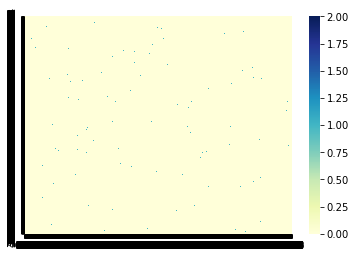

In [28]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(labels_test,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['001', '002', '003','004','006','009','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055',
                     '056','057','058','059','060','061','062','063','064','065','066','067','068','069', '070','071','072','073','074','075','076','077','078','079', '080','081','082','083','084','085','086','087','088','089', '090', '091','092','093','094','095','096','097','098','099', '100','101' ,'102' ,'103' ,'104' ,'105' ,'106' ,'107' ,'108' ,'109' ,'110' ,'111' ,'112' ,'113' ,'114' ,'115' ,'116' ,'117' ,'118' ,'119' ,'120' ,'121' ,'122' ,'123' ,'124' ,'125' ,'126' ,'127' ,'128' ,'129' ,'130' ,'131' ,'132' ,'133' ,'134' ,'135' ,'136' ,'137' ,'138' ,'139' ,'140' ,'141' ,'142' ,'143' ,'144' ,'145' ,'146' ,'147' ,'148' ,'149' ,'150' ,'151' ,'152' ,'153' ,'154' ,'155' ,'156' ,'157' ,'158' ,'159' ,'160' ,'161' ,'162' ,'163' ,'164' ,'165' ,'166' ,'167' ,'168' ,'169' ,'170' ,'171' ,'172' ,'173' ,'174' ,'175' ,'176' ,'177' ,'178' ,'179' ,'180' ,'181' ,'182' ,'183' ,'184' ,'185' ,'186' ,'187' ,'188' ,'189' ,'190' ,'191' ,'192' ,'193' ,'194' ,'195' ,'196' ,'197' ,'198' ,'199' ,'200' ,'201' ,'202' ,'203' ,'204' ,'205' ,'206' ,'207' ,'208' ,'209' ,'210' ,'211' ,'212' ,'213' ,'214' ,'215' ,'216' ,'217' ,'218' ,'219' ,'220' ,'221' ,'222' ,'223' ,'224' ,'225' ,'226' ,'227' ,'228' ,'229' ,'230' ,'231' ,'232' ,'233' ,'234' ,'235' ,'236' ,'237' ,'238' ,'239' ,'240' ,'241' ,'242' ,'243' ,'244' ,'245' ,'246' ,'247' ,'248' ,'249' ,'250' ,'251' ,'252' ,'253' ,'254' ,'255' ,'256' ,'257' ,'258' ,'259' ,'260' ,'261' ,'262' ,'263' ,'264' ,'265' ,'266' ,'267' ,'268' ,'269' ,'270' ,'271' ,'272' ,'273' ,'274' ,'275' ,'276' ,'277' ,'278' ,'279' ,'280' ,'281' ,'282' ,'283' ,'284' ,'285' ,'286' ,'287' ,'288' ,'289' ,'290' ,'291' ,'292' ,'293' ,'294' ,'295' ,'296' ,'297' ,'298' ,'299' ,'300' ,'301' ,'302' ,'303' ,'304' ,'305' ,'306' ,'307' ,'308' ,'309' ,'310' ,'311' ,'312' ,'313' ,'314' ,'315' ,'316' ,'317' ,'318' ,'319' ,'320' ,'321' ,'322' ,'323' ,'324' ,'325' ,'326' ,'327' ,'328' ,'329' ,'330' ,'331' ,'332' ,'333' ,'334' ,'335' ,'336' ,'337' ,'338' ,'339' ,'340' ,'341' ,'342' ,'343' ,'344' ,'345' ,'346' ,'347' ,'348' ,'349' ,'350' ,'351' ,'352' ,'353' ,'354' ,'355' ,'356' ,'357' ,'358' ,'359' ,'360' ,'361' ,'362' ,'363' ,'364' ,'365' ,'366' ,'367' ,'368' ,'369' ,'370' ,'371' ,'372' ,'373' ,'374' ,'375' ,'376' ,'377' ,'378' ,'379' ,'380' ,'381' ,'382' ,'383' ,'384' ,'385' ,'386' ,'387' ,'388' ,'389' ,'390' ,'391' ,'392' ,'393' ,'394' ,'395' ,'396' ,'397' ,'398' ,'399' ,'400' ,'401' ,'402' ,'403' ,'404' ,'405' ,'406' ,'407' ,'408' ,'409' ,'410' ,'411' ,'412' ,'413' ,'414' ,'415' ,'416' ,'417' ,'418' ,'419' ,'420' ,'421' ,'422' ,'423' ,'424' ,'425' ,'426' ,'427' ,'428' ,'429' ,'430' ,'431' ,'432' ,'433' ,'434' ,'435' ,'436' ,'437' ,'438' ,'439' ,'440' ,'441' ,'442' ,'443' ,'444' ,'445' ,'446' ,'447' ,'448' ,'449' ,'450' ,'451' ,'452' ,'453' ,'454' ,'455' ,'456' ,'457' ,'458' ,'459' ,'460' ,'461' ,'462' ,'463' ,'464' ,'465' ,'466' ,'467' ,'468' ,'469' ,'470' ,'471' ,'472' ,'473' ,'474' ,'475' ,'476' ,'477' ,'478' ,'479' ,'480' ,'481' ,'482' ,'483' ,'484' ,'485' ,'486' ,'487' ,'488' ,'489' ,'490' ,'491' ,'492' ,'493' ,'494' ,'495' ,'496' ,'497' ,'498' ,'499' ,'500' ,'501' ,'502' ,'503' ,'504' ,'505' ,'506' ,'507' ,'508' ,'509' ,'510' ,'511' ,'512' ,'513' ,'514' ,'515' ,'516' ,'517' ,'518' ,'519' ,'520' ,'521' ,'522' ,'523' ,'524' ,'525' ,'526' ,'527' ,'528' ,'529' ,'530' ,'531' ,'532' ,'533' ,'534' ,'535' ,'536' ,'537' ,'538' ,'539' ,'540' ,'541' ,'542' ,'543' ,'544' ,'545' ,'546' ,'547' ,'548' ,'549' ,'550' ,'551' ,'552' ,'553' ,'554' ,'555' ,'556' ,'557' ,'558' ,'559' ,'560' ,'561' ,'562' ,'563' ,'564' ,'565' ,'566' ,'567' ,'568' ,'569' ,'570' ,'571' ,'572' ,'573' ,'574' ,'575' ,'576' ,'577' ,'578' ,'579' ,'580' ,'581' ,'582' ,'583' ,'584' ,'585' ,'586' ,'587' ,'588' ,'589' ,'590' ,'591' ,'592' ,'593' ,'594' ,'595' ,'596' ,'597' ,'598' ,'599' ,'600' ,'601' ,'602' ,'603' ,'604' ,'605' ,'606' ,'607' ,'608' ,'609' ,'610' ,'611' ,'612' ,'613' ,'614' ,'615' ,'616' ,'617' ,'618' ,'619' ,'620' ,'621' ,'622' ,'623' ,'624' ,'625' ,'626' ,'627' ,'628' ,'629' ,'630' ,'631' ,'632' ,'633' ,'634' ,'635' ,'636' ,'637' ,'638' ,'639' ,'640' ,'641' ,'642' ,'643' ,'644' ,'645' ,'646' ,'647' ,'648' ,'649' ,'650' ,'651' ,'652' ,'653' ,'654' ,'655' ,'656' ,'657' ,'658' ,'659' ,'660' ,'661' ,'662' ,'663' ,'664' ,'665' ,'666' ,'667' ,'668' ,'669' ,'670' ,'671' ,'672' ,'673' ,'674' ,'675' ,'676' ,'677' ,'678' ,'679' ,'680' ,'681' ,'682' ,'683' ,'684' ,'685' ,'686' ,'687' ,'688' ,'689' ,'690' ,'691' ,'692' ,'693' ,'694' ,'695' ,'696' ,'697' ,'698' ,'699' ,'700' ,'701' ,'702' ,'703' ,'704' ,'705' ,'706' ,'707' ,'708' ,'709' ,'710' ,'711' ,'712' ,'713' ,'714' ,'715' ,'716' ,'717' ,'718' ,'719' ,'720' ,'721' ,'722' ,'723' ,'724' ,'725' ,'726' ,'727' ,'728' ,'729' ,'730' ,'731' ,'732' ,'733' ,'734' ,'735' ,'736' ,'737' ,'738' ,'739' ,'740' ,'741' ,'742' ,'743' ,'744' ,'745' ,'746' ,'747' ,'748' ,'749' ,'750' ,'751' ,'752' ,'753' ,'754' ,'755' ,'756' ,'757' ,'758' ,'759' ,'760' ,'761' ,'762' ,'763' ,'764' ,'765' ,'766' ,'767' ,'768' ,'769' ,'770' ,'771' ,'772' ,'773' ,'774' ,'775' ,'776' ,'777' ,'778' ,'779' ,'780' ,'781' ,'782' ,'783' ,'784' ,'785' ,'786' ,'787' ,'788' ,'789' ,'790' ,'791' ,'792' ,'793' ,'794' ,'795' ,'796' ,'797' ,'798' ,'799' ,'800' ,'801' ,'802' ,'803' ,'804' ,'805' ,'806' ,'807' ,'808' ,'809' ,'810' ,'811' ,'812' ,'813' ,'814' ,'815' ,'816' ,'817' ,'818' ,'819' ,'820' ,'821' ,'822' ,'823' ,'824' ,'825' ,'826' ,'827' ,'828' ,'829' ,'830' ,'831' ,'832' ,'833' ,'834' ,'835' ,'836' ,'837' ,'838' ,'839' ,'840' ,'841' ,'842' ,'843' ,'844' ,'845' ,'846' ,'847' ,'848' ,'849' ,'850' ,'851' ,'852' ,'853' ,'854' ,'855' ,'856' ,'857' ,'858' ,'859' ,'860' ,'861' ,'862' ,'863' ,'864' ,'865' ,'866' ,'867' ,'868' ,'869' ,'870' ,'871' ,'872' ,'873' ,'874' ,'875' ,'876' ,'877' ,'878' ,'879' ,'880' ,'881' ,'882' ,'883' ,'884' ,'885' ,'886' ,'887' ,'888' ,'889' ,'890' ,'891' ,'892' ,'893' ,'894' ,'895' ,'896' ,'897' ,'898' ,'899' ,'900' ,'901' ,'902' ,'903' ,'904' ,'905' ,'906' ,'907' ,'908' ,'909' ,'910' ,'911' ,'912' ,'913' ,'914' ,'915' ,'916' ,'917' ,'918' ,'919' ,'920' ,'921' ,'922' ,'923' ,'924' ,'925' ,'926' ,'927' ,'928' ,'929' ,'930' ,'931' ,'932' ,'933' ,'934' ,'935' ,'936' ,'937' ,'938' ,'939' ,'940' ,'941' ,'942' ,'943' ,'944' ,'945' ,'946' ,'947' ,'948' ,'949' ,'950' ,'951' ,'952' ,'953' ,'954' ,'955' ,'956' ,'957' ,'958' ,'959' ,'960' ,'961' ,'962' ,'963' ,'964' ,'965' ,'966' ,'967' ,'968' ,'969' ,'970' ,'971' ,'972' ,'973' ,'974' ,'975' ,'976' ,'977' ,'978' ,'979' ,'980' ,'981' ,'982' ,'983' ,'984' ,'985' ,'986' ,'987' ,'988' ,'989' ,'990' ,'991' ,'992' ,'993' ,'994' ,'995' ,'996' ,'997' ,'998' ,'999' ,'1000' ,'1001' ,'1002' ,'1003' ,'1004' ,'1005' ,'1006' ,'1007' ,'1008' ,'1009' ,'1010' ,'1011' ,'1012' ,'1013' ,'1014' ,'1015' ,'1016' ,'1017' ,'1018' ,'1019' ,'1020' ,'1021' ,'1022' ,'1023' ,'1024' ,'1025' ,'1026' ,'1027' ,'1028' ,'1029' ,'1030' ,'1031' ,'1032' ,'1033' ,'1034' ,'1035' ,'1036' ,'1037' ,'1038' ,'1039' ,'1040' ,'1041' ,'1042' ,'1043' ,'1044' ,'1045' ,'1046' ,'1047' ,'1048' ,'1049' ,'1050' ,'1051' ,'1052' ,'1053' ,'1054' ,'1055' ,'1056' ,'1057' ,'1058' ,'1059' ,'1060' ,'1061' ,'1062' ,'1063' ,'1064' ,'1065' ,'1066' ,'1067' ,'1068' ,'1069' ,'1070' ,'1071' ,'1072' ,'1073' ,'1074' ,'1075' ,'1076' ,'1077' ,'1078' ,'1079' ,'1080' ,'1081' ,'1082' ,'1083' ,'1084' ,'1085' ,'1086' ,'1087' ,'1088' ,'1089' ,'1090' ,'1091' ,'1092' ,'1093' ,'1094' ,'1095' ,'1096' ,'1097' ,'1098' ,'1099' ,'1100' ,'1101' ,'1102' ,'1103' ,'1104' ,'1105' ,'1106' ,'1107' ,'1108' ,'1109' ,'1110' ,'1111' ,'1112' ,'1113' ,'1114' ,'1115' ,'1116' ,'1117' ,'1118' ,'1119' ,'1120' ,'1121' ,'1122' ,'1123' ,'1124' ,'1125' ,'1126' ,'1127' ,'1128' ,'1129' ,'1130' ,'1131' ,'1132' ,'1133' ,'1134' ,'1135' ,'1136' ,'1137' ,'1138' ,'1139' ,'1140' ,'1141' ,'1142' ,'1143' ,'1144' ,'1145' ,'1146' ,'1147' ,'1148' ,'1149' ,'1150' ,'1151' ,'1152' ,'1153' ,'1154' ,'1155' ,'1156' ,'1157' ,'1158' ,'1159' ,'1160' ,'1161' ,'1162' ,'1163' ,'1164' ,'1165' ,'1166' ,'1167' ,'1168' ,'1169' ,'1170' ,'1171' ,'1172' ,'1173' ,'1174' ,'1175' ,'1176' ,'1177' ,'1178' ,'1179' ,'1180' ,'1181' ,'1182' ,'1183' ,'1184' ,'1185' ,'1186' ,'1187' ,'1188' ,'1189' ,'1190' ,'1191' ,'1192' ,'1193' ,'1194' ,'1195' ,'1196' ,'1197' ,'1198' ,'1199' ,'1200' ,'1201' ,'1202' ,'1203' ,'1204' ,'1205' ,'1206' ,'1207' ,'1208' ,'1209' ,'1210' ,'1211' ,'1212' ,'1213' ,'1214' ,'1215' ,'1216' ,'1217' ,'1218' ,'1219' ,'1220' ,'1221' ,'1222' ,'1223' ,'1224' ,'1225' ,'1226' ,'1227' ,'1228' ,'1229' ,'1230' ,'1231' ,'1232' ,'1233' ,'1234' ,'1235' ,'1236' ,'1237' ,'1238' ,'1239' ,'1240' ,'1241' ,'1242' ,'1243' ,'1244' ,'1245' ,'1246' ,'1247' ,'1248' ,'1249' ,'1250' ,'1251' ,'1252' ,'1253' ,'1254' ,'1255' ,'1256' ,'1257' ,'1258' ,'1259' ,'1260' ,'1261' ,'1262' ,'1263' ,'1264' ,'1265' ,'1266' ,'1267' ,'1268' ,'1269' ,'1270' ,'1271' ,'1272' ,'1273' ,'1274' ,'1275' ,'1276' ,'1277' ,'1278' ,'1279' ,'1280' ,'1281' ,'1282' ,'1283' ,'1284' ,'1285' ,'1286' ,'1287' ,'1288' ,'1289' ,'1290' ,'1291' ,'1292' ,'1293' ,'1294' ,'1295' ,'1296' ,'1297' ,'1298' ,'1299' ,'1300' ,'1301' ,'1302' ,'1303' ,'1304' ,'1305' ,'1306' ,'1307' ,'1308' ,'1309' ,'1310' ,'1311' ,'1312' ,'1313' ,'1314' ,'1315' ,'1316' ,'1317' ,'1318' ,'1319' ,'1320' ,'1321' ,'1322' ,'1323' ,'1324' ,'1325' ,'1326' ,'1327' ,'1328' ,'1329' ,'1330' ,'1331' ,'1332' ,'1333' ,'1334' ,'1335' ,'1336' ,'1337' ,'1338' ,'1339' ,'1340' ,'1341' ,'1342' ,'1343' ,'1344' ,'1345' ,'1346' ,'1347' ,'1348' ,'1349' ,'1350' ,'1351' ,'1352' ,'1353' ,'1354' ,'1355' ,'1356' ,'1357' ,'1358' ,'1359' ,'1360' ,'1361' ,'1362' ,'1363' ,'1364' ,'1365' ,'1366' ,'1367' ,'1368' ,'1369' ,'1370' ,'1371' ,'1372' ,'1373' ,'1374' ,'1375' ,'1376' ,'1377' ,'1378' ,'1379' ,'1380' ,'1381' ,'1382' ,'1383' ,'1384' ,'1385' ,'1386' ,'1387' ,'1388' ,'1389' ,'1390' ,'1391' ,'1392' ,'1393' ,'1394' ,'1395' ,'1396' ,'1397' ,'1398' ,'1399' ,'1400' ,'1401' ,'1402' ,'1403' ,'1404' ,'1405' ,'1406' ,'1407' ,'1408' ,'1409' ,'1410' ,'1411' ,'1412' ,'1413' ,'1414' ,'1415' ,'1416' ,'1417' ,'1418' ,'1419' ,'1420' ,'1421' ,'1422' ,'1423' ,'1424' ,'1425' ,'1426' ,'1427' ,'1428' ,'1429' ,'1430' ,'1431' ,'1432' ,'1433' ,'1434' ,'1435' ,'1436' ,'1437' ,'1438' ,'1439' ,'1440' ,'1441' ,'1442' ,'1443' ,'1444' ,'1445' ,'1446' ,'1447' ,'1448' ,'1449' ,'1450' ,'1451' ,'1452' ,'1453' ,'1454' ,'1455' ,'1456' ,'1457' ,'1458' ,'1459' ,'1460' ,'1461' ,'1462' ,'1463' ,'1464' ,'1465' ,'1466' ,'1467' ,'1468' ,'1469' ,'1470' ,'1471' ,'1472' ,'1473' ,'1474' ,'1475' ,'1476' ,'1477' ,'1478' ,'1479' ,'1480' ,'1481' ,'1482' ,'1483' ,'1484' ,'1485' ,'1486' ,'1487' ,'1488' ,'1489' ,'1490' ,'1491' ,'1492' ,'1493' ,'1494' ,'1495' ,'1496' ,'1497' ,'1498' ,'1499' ,'1500' ,'1501' ,'1502' ,'1503' ,'1504' ,'1505' ,'1506' ,'1507' ,'1508' ,'1509' ,'1510' ,'1511' ,'1512' ,'1513' ,'1514' ,'1515' ,'1516' ,'1517' ,'1518' ,'1519' ,'1520' ,'1521' ,'1522' ,'1523' ,'1524' ,'1525' ,'1526' ,'1527' ,'1528' ,'1529' ,'1530' ,'1531' ,'1532' ,'1533' ,'1534' ,'1535' ,'1536' ,'1537' ,'1538' ,'1539' ,'1540' ,'1541' ,'1542' ,'1543' ,'1544' ,'1545' ,'1546' ,'1547' ,'1548' ,'1549' ,'1550' ,'1551' ,'1552' ,'1553' ,'1554' ,'1555' ,'1556' ,'1557' ,'1558' ,'1559' ,'1560' ,'1561' ,'1562' ,'1563' ,'1564' ,'1565' ,'1566' ,'1567' ,'1568' ,'1569' ,'1570' ,'1571' ,'1572' ,'1573' ,'1574' ,'1575' ,'1576' ,'1577' ,'1578' ,'1579' ,'1580' ,'1581' ,'1582' ,'1583' ,'1584' ,'1585' ,'1586' ,'1587' ,'1588' ,'1589' ,'1590' ,'1591' ,'1592' ,'1593' ,'1594' ,'1595' ,'1596' ,'1597' ,'1598' ,'1599' ,'1600' ,'1601' ,'1602' ,'1603' ,'1604' ,'1605' ,'1606' ,'1607' ,'1608' ,'1609' ,'1610' ,'1611' ,'1612' ,'1613' ,'1614' ,'1615' ,'1616' ,'1617' ,'1618' ,'1619' ,'1620' ,'1621' ,'1622' ,'1623' ,'1624' ,'1625' ,'1626' ,'1627' ,'1628' ,'1629' ,'1630' ,'1631' ,'1632' ,'1633' ,'1634' ,'1635' ,'1636' ,'1637' ,'1638' ,'1639' ,'1640' ,'1641' ,'1642' ,'1643' ,'1644' ,'1645' ,'1646' ,'1647' ,'1648' ,'1649' ,'1650' ,'1651' ,'1652' ,'1653' ,'1654' ,'1655' ,'1656' ,'1657' ,'1658' ,'1659' ,'1660' ,'1661' ,'1662' ,'1663' ,'1664' ,'1665' ,'1666' ,'1667' ,'1668' ,'1669' ,'1670' ,'1671' ,'1672' ,'1673' ,'1674' ,'1675' ,'1676' ,'1677' ,'1678' ,'1679' ,'1680' ,'1681' ,'1682' ,'1683' ,'1684' ,'1685' ,'1686' ,'1687' ,'1688' ,'1689' ,'1690' ,'1691' ,'1692' ,'1693' ,'1694' ,'1695' ,'1696' ,'1697' ,'1698' ,'1699' ,'1700' ,'1701' ,'1702' ,'1703' ,'1704' ,'1705' ,'1706' ,'1707' ,'1708' ,'1709' ,'1710' ,'1711' ,'1712' ,'1713' ,'1714' ,'1715' ,'1716' ,'1717' ,'1718' ,'1719' ,'1720' ,'1721' ,'1722' ,'1723' ,'1724' ,'1725' ,'1726' ,'1727' ,'1728' ,'1729' ,'1730' ,'1731' ,'1732' ,'1733' ,'1734' ,'1735' ,'1736' ,'1737' ,'1738' ,'1739' ,'1740' ,'1741' ,'1742' ,'1743' ,'1744' ,'1745' ,'1746' ,'1747' ,'1748' ,'1749' ,'1750' ,'1751' ,'1752' ,'1753' ,'1754' ,'1755' ,'1756' ,'1757' ,'1758' ,'1759' ,'1760' ,'1761' ,'1762' ,'1763' ,'1764' ,'1765' ,'1766' ,'1767' ,'1768' ,'1769' ,'1770' ,'1771' ,'1772' ,'1773' ,'1774' ,'1775' ,'1776' ,'1777' ,'1778' ,'1779' ,'1780' ,'1781' ,'1782' ,'1783' ,'1784' ,'1785' ,'1786' ,'1787' ,'1788' ,'1789' ,'1790' ,'1791' ,'1792' ,'1793' ,'1794' ,'1795' ,'1796' ,'1797' ,'1798' ,'1799' ,'1800' ,'1801' ,'1802' ,'1803' ,'1804' ,'1805' ,'1806' ,'1807' ,'1808' ,'1809' ,'1810' ,'1811' ,'1812' ,'1813' ,'1814' ,'1815' ,'1816' ,'1817' ,'1818' ,'1819' ,'1820' ,'1821' ,'1822' ,'1823' ,'1824' ,'1825' ,'1826' ,'1827' ,'1828' ,'1829' ,'1830' ,'1831' ,'1832' ,'1833' ,'1834' ,'1835' ,'1836' ,'1837' ,'1838' ,'1839' ,'1840' ,'1841' ,'1842' ,'1843' ,'1844' ,'1845' ,'1846' ,'1847' ,'1848' ,'1849' ,'1850' ,'1851' ,'1852' ,'1853' ,'1854' ,'1855' ,'1856' ,'1857' ,'1858' ,'1859' ,'1860' ,'1861' ,'1862' ,'1863' ,'1864' ,'1865' ,'1866' ,'1867' ,'1868' ,'1869' ,'1870' ,'1871' ,'1872' ,'1873' ,'1874' ,'1875' ,'1876' ,'1877' ,'1878' ,'1879' ,'1880' ,'1881' ,'1882' ,'1883' ,'1884' ,'1885' ,'1886' ,'1887' ,'1888' ,'1889' ,'1890' ,'1891' ,'1892' ,'1893' ,'1894' ,'1895' ,'1896' ,'1897' ,'1898' ,'1899' ,'1900' ,'1901' ,'1902' ,'1903' ,'1904' ,'1905' ,'1906' ,'1907' ,'1908' ,'1909' ,'1910' ,'1911' ,'1912' ,'1913' ,'1914' ,'1915' ,'1916' ,'1917' ,'1918' ,'1919' ,'1920' ,'1921' ,'1922' ,'1923' ,'1924' ,'1925' ,'1926' ,'1927' ,'1928' ,'1929' ,'1930' ,'1931' ,'1932' ,'1933' ,'1934' ,'1935' ,'1936' ,'1937' ,'1938' ,'1939' ,'1940' ,'1941' ,'1942' ,'1943' ,'1944' ,'1945' ,'1946' ,'1947' ,'1948' ,'1949' ,'1950' ,'1951' ,'1952' ,'1953' ,'1954' ,'1955' ,'1956' ,'1957' ,'1958' ,'1959' ,'1960' ,'1961' ,'1962' ,'1963' ,'1964' ,'1965' ,'1966' ,'1967' ,'1968' ,'1969' ,'1970' ,'1971' ,'1972' ,'1973' ,'1974' ,'1975' ,'1976' ,'1977' ,'1978' ,'1979' ,'1980' ,'1981' ,'1982' ,'1983' ,'1984' ,'1985' ,'1986' ,'1987' ,'1988' ,'1989' ,'1990' ,'1991' ,'1992' ,'1993' ,'1994' ,'1995' ,'1996' ,'1997' ,'1998' ,'1999' ,'2000' ,'2001' ,'2002' ,'2003' ,'2004' ,'2005' ,'2006' ,'2007' ,'2008' ,'2009' ,'2010' ,'2011' ,'2012' ,'2013' ,'2014' ,'2015' ,'2016' ,'2017' ,'2018' ,'2019' ,'2020' ,'2021' ,'2022' ,'2023' ,'2024' ,'2025' ,'2026' ,'2027' ,'2028' ,'2029' ,'2030' ,'2031' ,'2032' ,'2033' ,'2034' ,'2035' ,'2036' ,'2037' ,'2038' ,'2039' ,'2040' ,'2041' ,'2042' ,'2043' ,'2044' ,'2045' ,'2046' ,'2047' ,'2048' ,'2049' ,'2050' ,'2051' ,'2052' ,'2053' ,'2054' ,'2055' ,'2056' ,'2057' ,'2058' ,'2059' ,'2060' ,'2061' ,'2062' ,'2063' ,'2064' ,'2065' ,'2066' ,'2067' ,'2068' ,'2069' ,'2070' ,'2071' ,'2072' ,'2073' ,'2074' ,'2075' ,'2076' ,'2077' ,'2078' ,'2079' ,'2080' ,'2081' ,'2082' ,'2083' ,'2084' ,'2085' ,'2086' ,'2087' ,'2088' ,'2089' ,'2090' ,'2091' ,'2092' ,'2093' ,'2094' ,'2095' ,'2096' ,'2097' ,'2098' ,'2099' ,'2100' ,'2101' ,'2102' ,'2103' ,'2104' ,'2105' ,'2106' ,'2107' ,'2108' ,'2109' ,'2110' ,'2111' ,'2112' ,'2113' ,'2114' ,'2115' ,'2116' ,'2117' ,'2118' ,'2119' ,'2120' ,'2121' ,'2122' ,'2123' ,'2124' ,'2125' ,'2126' ,'2127' ,'2128' ,'2129' ,'2130' ,'2131' ,'2132' ,'2133' ,'2134' ,'2135' ,'2136' ,'2137' ,'2138' ,'2139' ,'2140' ,'2141' ,'2142' ,'2143' ,'2144' ,'2145' ,'2146' ,'2147' ,'2148' ,'2149' ,'2150' ,'2151' ,'2152' ,'2153' ,'2154' ,'2155' ,'2156' ,'2157' ,'2158' ,'2159' ,'2160' ,'2161' ,'2162' ,'2163' ,'2164' ,'2165' ,'2166' ,'2167' ,'2168' ,'2169' ,'2170' ,'2171' ,'2172' ,'2173' ,'2174' ,'2175' ,'2176' ,'2177' ,'2178' ,'2179' ,'2180' ,'2181' ,'2182' ,'2183' ,'2184' ,'2185' ,'2186' ,'2187' ,'2188' ,'2189' ,'2190' ,'2191' ,'2192' ,'2193' ,'2194' ,'2195' ,'2196' ,'2197' ,'2198' ,'2199' ,'2200' ,'2201' ,'2202' ,'2203' ,'2204' ,'2205' ,'2206' ,'2207' ,'2208' ,'2209' ,'2210' ,'2211' ,'2212' ,'2213' ,'2214' ,'2215' ,'2216' ,'2217' ,'2218' ,'2219' ,'2220' ,'2221' ,'2222' ,'2223' ,'2224' ,'2225' ,'2226' ,'2227' ,'2228' ,'2229' ,'2230' ,'2231' ,'2232' ,'2233' ,'2234' ,'2235' ,'2236' ,'2237' ,'2238' ,'2239' ,'2240' ,'2241' ,'2242' ,'2243' ,'2244' ,'2245' ,'2246' ,'2247' ,'2248' ,'2249' ,'2250' ,'2251' ,'2252' ,'2253' ,'2254' ,'2255' ,
                     '2256' ,'2257' ,'2258' ,'2259' ,'2260' ,'2261' ,'2262' ,'2263' ,'2264' ,'2265' ,'2266' ,'2267' ,'2268' ,'2269' ,'2270' ,'2271' ,'2272' ,'2273' ,'2274' ,'2275' ,'2276' ,'2277' ,'2278' ,'2279' ,'2280' ,'2281' ,'2282' ,'2283' ,'2284' ,'2285' ,'2286' ,'2287' ,'2288' ,'2289' ,'2290' ,'2291' ,'2292' ,'2293' ,'2294' ,'2295' ,'2296' ,'2297' ,'2298' ,'2299' ,'2300' ,'2301' ,'2302' ,'2303' ,'2304' ,'2305' ,'2306' ,'2307' ,'2308' ,'2309' ,'2310' ,'2311' ,'2312' ,'2313' ,'2314' ,'2315' ,'2316' ,'2317' ,'2318' ,'2319' ,'2320' ,'2321' ,'2322' ,'2323' ,'2324' ,'2325' ,'2326' ,'2327' ,'2328' ,'2329' ,'2330' ,'2331' ,'2332' ,'2333' ,'2334' ,'2335' ,'2336' ,'2337' ,'2338' ,'2339' ,'2340' ,'2341' ,'2342' ,'2343' ,'2344' ,'2345' ,'2346' ,'2347' ,'2348' ,'2349' ,'2350' ,'2351' ,'2352' ,'2353' ,'2354' ,'2355' ,'2356' ,'2357' ,'2358' ,'2359' ,'2360' ,'2361' ,'2362' ,'2363' ,'2364' ,'2365' ,'2366' ,'2367' ,'2368' ,'2369' ,'2370' ,'2371' ,'2372' ,'2373' ,'2374' ,'2375' ,'2376' ,'2377' ,'2378' ,'2379' ,'2380' ,'2381' ,'2382' ,'2383' ,'2384' ,'2385' ,'2386' ,'2387' ,'2388' ,'2389' ,'2390' ,'2391' ,'2392' ,'2393' ,'2394' ,'2395' ,'2396' ,'2397' ,'2398' ,'2399' ,'2400' ,'2401' ,'2402' ,'2403' ,'2404' ,'2405' ,'2406' ,'2407' ,'2408' ,'2409' ,'2410' ,'2411' ,'2412' ,'2413' ,'2414' ,'2415' ,'2416' ,'2417' ,'2418' ,'2419' ,'2420' ,'2421' ,'2422' ,'2423' ,'2424' ,'2425' ,'2426' ,'2427' ,'2428' ,'2429' ,'2430' ,'2431' ,'2432' ,'2433' ,'2434' ,'2435' ,'2436' ,'2437' ,'2438' ,'2439' ,'2440' ,'2441' ,'2442' ,'2443' ,'2444' ,'2445' ,'2446' ,'2447' ,'2448' ,'2449' ,'2450' ,'2451' ,'2452' ,'2453' ,'2454' ,'2455' ,'2456' ,'2457' ,'2458' ,'2459' ,'2460' ,'2461' ,'2462' ,'2463' ,'2464' ,'2465' ,'2466' ,'2467' ,'2468' ,'2469' ,'2470' ,'2471' ,'2472' ,'2473' ,'2474' ,'2475' ,'2476' ,'2477' ,'2478' ,'2479' ,'2480' ,'2481' ,'2482' ,'2483' ,'2484' ,'2485' ,'2486' ,'2487' ,'2488' ,'2489' ,'2490' ,'2491' ,'2492' ,'2493' ,'2494' ,'2495' ,'2496' ,'2497' ,'2498' ,'2499' ,'2500' ,'2501' ,'2502' ,'2503' ,'2504' ,'2505' ,'2506' ,'2507' ,'2508' ,'2509' ,'2510' ,'2511' ,'2512' ,'2513' ,'2514' ,'2515' ,'2516' ,'2517' ,'2518' ,'2519' ,'2520' ,'2521' ,'2522' ,'2523' ,'2524' ,'2525' ,'2526' ,'2527' ,'2528' ,'2529' ,'2530' ,'2531' ,'2532' ,'2533' ,'2534' ,'2535' ,'2536' ,'2537' ,'2538' ,'2539' ,'2540' ,'2541' ,'2542' ,'2543' ,'2544' ,'2545' ,'2546' ,'2547' ,'2548' ,'2549' ,'2550' ,'2551' ,'2552' ,'2553' ,'2554' ,'2555' ,'2556' ,'2557' ,'2558' ,'2559' ,'2560' ,'2561' ,'2562' ,'2563' ,'2564' ,'2565' ,'2566' ,'2567' ,'2568' ,'2569' ,'2570' ,'2571' ,'2572' ,'2573' ,'2574' ,'2575' ,'2576' ,'2577' ,'2578' ,'2579' ,'2580' ,'2581' ,'2582' ,'2583' ,'2584' ,'2585' ,'2586' ,'2587' ,'2588' ,'2589' ,'2590' ,'2591' ,'2592' ,'2593' ,'2594' ,'2595' ,'2596' ,'2597' ,'2598' ,'2599' ,'2600' ,'2601' ,'2602' ,'2603' ,'2604' ,'2605' ,'2606' ,'2607' ,'2608' ,'2609' ,'2610' ,'2611' ,'2612' ,'2613' ,'2614' ,'2615' ,'2616' ,'2617' ,'2618' ,'2619' ,'2620' ,'2621' ,'2622' ,'2623' ,'2624' ,'2625' ,'2626' ,'2627' ,'2628' ,'2629' ,'2630' ,'2631' ,'2632' ,'2633' ,'2634' ,'2635' ,'2636' ,'2637' ,'2638' ,'2639' ,'2640' ,'2641' ,'2642' ,'2643' ,'2644' ,'2645' ,'2646' ,'2647' ,'2648' ,'2649' ,'2650' ,'2651' ,'2652' ,'2653' ,'2654' ,'2655' ,'2656' ,'2657' ,'2658' ,'2659' ,'2660' ,'2661' ,'2662' ,'2663' ,'2664' ,'2665' ,'2666' ,'2667' ,'2668' ,'2669' ,'2670' ,'2671' ,'2672' ,'2673' ,'2674' ,'2675' ,'2676' ,'2677' ,'2678' ,'2679' ,'2680' ,'2681' ,'2682' ,'2683' ,'2684' ,'2685' ,'2686' ,'2687' ,'2688' ,'2689' ,'2690' ,'2691' ,'2692' ,'2693' ,'2694' ,'2695' ,'2696' ,'2697' ,'2698' ,'2699' ,'2700' ,'2701' ,'2702' ,'2703' ,'2704' ,'2705' ,'2706' ,'2707' ,'2708' ,'2709' ,'2710' ,'2711' ,'2712' ,'2713' ,'2714' ,'2715' ,'2716' ,'2717' ,'2718' ,'2719' ,'2720' ,'2721' ,'2722' ,'2723' ,'2724' ,'2725' ,'2726' ,'2727' ,'2728' ,'2729' ,'2730' ,'2731' ,'2732' ,'2733' ,'2734' ,'2735' ,'2736' ,'2737' ,'2738' ,'2739' ,'2740' ,'2741' ,'2742' ,'2743' ,'2744' ,'2745' ,'2746' ,'2747' ,'2748' ,'2749' ,'2750' ,'2751' ,'2752' ,'2753' ,'2754' ,'2755' ,'2756' ,'2757' ,'2758' ,'2759' ,'2760' ,'2761' ,'2762' ,'2763' ,'2764' ,'2765' ,'2766' ,'2767' ,'2768' ,'2769' ,'2770' ,'2771' ,'2772' ,'2773' ,'2774' ,'2775' ,'2776' ,'2777' ,'2778' ,'2779' ,'2780' ,'2781' ,'2782' ,'2783' ,'2784' ,'2785' ,'2786' ,'2787' ,'2788' ,'2789' ,'2790' ,'2791' ,'2792' ,'2793' ,'2794' ,'2795' ,'2796' ,'2797' ,'2798' ,'2799' ,'2800' ,'2801' ,'2802' ,'2803' ,'2804' ,'2805' ,'2806' ,'2807' ,'2808' ,'2809' ,'2810' ,'2811' ,'2812' ,'2813' ,'2814' ,'2815' ,'2816' ,'2817' ,'2818' ,'2819' ,'2820' ,'2821' ,'2822' ,'2823' ,'2824' ,'2825' ,'2826' ,'2827' ,'2828' ,'2829' ,'2830' ,'2831' ,'2832' ,'2833' ,'2834' ,'2835' ,'2836' ,'2837' ,'2838' ,'2839' ,'2840' ,'2841' ,'2842' ,'2843' ,'2844' ,'2845' ,'2846' ,'2847' ,'2848' ,'2849' ,'2850' ,'2851' ,'2852' ,'2853' ,'2854' ,'2855' ,'2856' ,'2857' ,'2858' ,'2859' ,'2860' ,'2861' ,'2862' ,'2863' ,'2864' ,'2865' ,'2866' ,'2867' ,'2868' ,'2869' ,'2870' ,'2871' ,'2872' ,'2873' ,'2874' ,'2875' ,'2876' ,'2877' ,'2878' ,'2879' ,'2880' ,'2881' ,'2882' ,'2883' ,'2884' ,'2885' ,'2886' ,'2887' ,'2888' ,'2889' ,'2890' ,'2891' ,'2892' ,'2893' ,'2894' ,'2895' ,'2896' ,'2897' ,'2898' ,'2899' ,'2900' ,'2901' ,'2902' ,'2903' ,'2904' ,'2905' ,'2906' ,'2907' ,'2908' ,'2909' ,'2910' ,'2911' ,'2912' ,'2913' ,'2914' ,'2915' ,'2916' ,'2917' ,'2918' ,'2919' ,'2920' ,'2921' ,'2922' ,'2923' ,'2924' ,'2925' ,'2926' ,'2927' ,'2928' ,'2929' ,'2930' ,'2931' ,'2932' ,'2933' ,'2934' ,'2935' ,'2936' ,'2937' ,'2938' ,'2939' ,'2940' ,'2941' ,'2942' ,'2943' ,'2944' ,'2945' ,'2946' ,'2947' ,'2948' ,'2949' ,'2950' ,'2951' ,'2952' ,'2953' ,'2954' ,'2955' ,'2956' ,'2957' ,'2958' ,'2959' ,'2960' ,'2961' ,'2962' ,'2963' ,'2964' ,'2965' ,'2966' ,'2967' ,'2968' ,'2969' ,'2970' ,'2971' ,'2972' ,'2973' ,'2974' ,'2975' ,'2976' ,'2977' ,'2978' ,'2979' ,'2980' ,'2981' ,'2982' ,'2983' ,'2984' ,'2985' ,'2986' ,'2987' ,'2988' ,'2989' ,'2990' ,'2991' ,'2992' ,'2993' ,'2994' ,'2995' ,'2996' ,'2997' ,'2998' ,'2999' ,'3000' ,'3001' ,'3002' ,'3003' ,'3004' ,'3005' ,'3006' ,'3007' ,'3008' ,'3009' ,'3010' ,'3011' ,'3012' ,'3013' ,'3014' ,'3015' ,'3016' ,'3017' ,'3018' ,'3019' ,'3020' ,'3021' ,'3022' ,'3023' ,'3024' ,'3025' ,'3026' ,'3027' ,'3028' ,'3029' ,'3030' ,'3031' ,'3032' ,'3033' ,'3034' ,'3035' ,'3036' ,'3037' ,'3038' ,'3039' ,'3040' ,'3041' ,'3042' ,'3043' ,'3044' ,'3045' ,'3046' ,'3047' ,'3048' ,'3049' ,'3050' ,'3051' ,'3052' ,'3053' ,'3054' ,'3055' ,'3056' ,'3057' ,'3058' ,'3059' ,'3060' ,'3061' ,'3062' ,'3063' ,'3064' ,'3065' ,'3066' ,'3067' ,'3068' ,'3069' ,'3070' ,'3071' ,'3072' ,'3073' ,'3074' ,'3075' ,'3076' ,'3077' ,'3078' ,'3079' ,'3080' ,'3081' ,'3082' ,'3083' ,'3084' ,'3085' ,'3086' ,'3087' ,'3088' ,'3089' ,'3090' ,'3091' ,'3092' ,'3093' ,'3094' ,'3095' ,'3096' ,'3097' ,'3098' ,'3099' ,'3100' ,'3101' ,'3102' ,'3103' ,'3104' ,'3105' ,'3106' ,'3107' ,'3108' ,'3109' ,'3110' ,'3111' ,'3112' ,'3113' ,'3114' ,'3115' ,'3116' ,'3117' ,'3118' ,'3119' ,'3120' ,'3121' ,'3122' ,'3123' ,'3124' ,'3125' ,'3126' ,'3127' ,'3128' ,'3129' ,'3130' ,'3131' ,'3132' ,'3133' ,'3134' ,'3135' ,'3136' ,'3137' ,'3138' ,'3139' ,'3140' ,'3141' ,'3142' ,'3143' ,'3144' ,'3145' ,'3146' ,'3147' ,'3148' ,'3149' ,'3150' ,'3151' ,'3152' ,'3153' ,'3154' ,'3155' ,'3156' ,'3157' ,'3158' ,'3159' ,'3160' ,'3161' ,'3162' ,'3163' ,'3164' ,'3165' ,'3166' ,'3167' ,'3168' ,'3169' ,'3170' ,'3171' ,'3172' ,'3173' ,'3174' ,'3175' ,'3176' ,'3177' ,'3178' ,'3179' ,'3180' ,'3181' ,'3182' ,'3183' ,'3184' ,'3185' ,'3186' ,'3187' ,'3188' ,'3189' ,'3190' ,'3191' ,'3192' ,'3193' ,'3194' ,'3195' ,'3196' ,'3197' ,'3198' ,'3199' ,'3200' ,'3201' ,'3202' ,'3203' ,'3204' ,'3205' ,'3206' ,'3207' ,'3208' ,'3209' ,'3210' ,'3211' ,'3212' ,'3213' ,'3214' ,'3215' ,'3216' ,'3217' ,'3218' ,'3219' ,'3220' ,'3221' ,'3222' ,'3223' ,'3224' ,'3225' ,'3226' ,'3227' ,'3228' ,'3229' ,'3230' ,'3231' ,'3232' ,'3233' ,'3234' ,'3235' ,'3236' ,'3237' ,'3238' ,'3239' ,'3240' ,'3241' ,'3242' ,'3243' ,'3244' ,'3245' ,'3246' ,'3247' ,'3248' ,'3249' ,'3250' ,'3251' ,'3252' ,'3253' ,'3254' ,'3255' ,'3256' ,'3257' ,'3258' ,'3259' ,'3260' ,'3261' ,'3262' ,'3263' ,'3264' ,'3265' ,'3266' ,'3267' ,'3268' ,'3269' ,'3270' ,'3271' ,'3272' ,'3273' ,'3274' ,'3275' ,'3276' ,'3277' ,'3278' ,'3279' ,'3280' ,'3281' ,'3282' ,'3283' ,'3284' ,'3285' ,'3286' ,'3287' ,'3288' ,'3289' ,'3290' ,'3291' ,'3292' ,'3293' ,'3294' ,'3295' ,'3296' ,'3297' ,'3298' ,
                     '3299' ,'3300' ,'3301' ,'3302' ,'3303' ,'3304' ,'3305' ,'3306' ,'3307' ,'3308' ,'3309' ,'3310' ,'3311' ,'3312' ,'3313' ,'3314' ,'3315' ,'3316' ,'3317' ,'3318' ,'3319' ,'3320' ,'3321' ,'3322' ,'3323' ,'3324' ,'3325' ,'3326' ,'3327' ,'3328' ,'3329' ,'3330' ,'3331' ,'3332' ,'3333' ,'3334' ,'3335' ,'3336' ,'3337' ,'3338' ,'3339' ,'3340' ,'3341' ,'3342' ,'3343' ,'3344' ,'3345' ,'3346' ,'3347' ,'3348' ,'3349' ,'3350' ,'3351' ,'3352' ,'3353' ,'3354' ,'3355' ,'3356' ,'3357' ,'3358' ,'3359' ,'3360' ,'3361' ,'3362' ,'3363' ,'3364' ,'3365' ,'3366' ,'3367' ,'3368' ,'3369' ,'3370' ,'3371' ,'3372' ,'3373' ,'3374' ,'3375' ,'3376' ,'3377' ,'3378' ,'3379' ,
                     '3380' ,'3381' ,'3382' ,'3383' ,'3384' ,'3385' ,'3386' ,'3387' ,'3388' ,'3389' ,'3390' ,'3391' ,'3392' ,'3393' ,'3394' ,'3395' ,'3396' ,'3397' ,'3398' ,'3399' ,'3400' ,'3401' ,'3402' ,'3403' ,'3404' ,'3405' ,'3406' ,'3407' ,'3408' ,'3409' ,'3410' ,'3411' ,'3412' ,'3413' ,'3414' ,'3415' ,'3416' ,'3417' ,'3418' ,'3419' ,'3420' ,'3421' ,'3422' ,'3423' ,'3424' ,'3425' ,'3426' ,'3427' ,'3428' ,'3429' ,'3430' ,'3431' ,'3432' ,'3433' ,'3434' ,'3435' ,'3436' ,'3437' ,'3438' ,'3439' ,'3440' ,'3441' ,'3442' ,'3443' ,'3444' ,'3445' ,'3446' ,'3447' ,'3448' ,'3449' ,'3450' ,'3451' ,'3452' ,'3453' ,'3454' ,'3455' ,'3456' ,'3457' ,'3458' ,'3459' ,'3460' ,'3461' ,'3462' ,'3463' ,'3464' ,'3465' ,'3466' ,'3467' ,'3468' ,'3469' ,'3470' ,'3471' ,'3472' ,'3473' ,'3474' ,'3475' ,'3476' ,'3477' ,'3478' ,'3479' ,'3480' ,'3481' ,'3482' ,'3483' ,'3484' ,'3485' ,'3486' ,'3487' ,'3488' ,'3489' ,'3490' ,'3491' ,'3492' ,'3493' ,'3494' ,'3495' ,'3496' ,'3497' ,'3498' ,'3499' ,'3500' ,'3501' ,'3502' ,'3503' ,'3504' ,'3505' ,'3506' ,'3507' ,'3508' ,'3509' ,'3510' ,'3511' ,'3512' ,'3513' ,'3514' ,'3515' ,'3516' ,'3517' ,'3518' ,'3519' ,'3520' ,'3521' ,'3522' ,'3523' ,'3524' ,'3525' ,'3526' ,'3527' ,'3528' ,'3529' ,'3530' ,'3531' ,'3532' ,'3533' ,'3534' ,'3535' ,'3536' ,'3537' ,'3538' ,'3539' ,'3540' ,'3541' ,'3542' ,'3543' ,'3544' ,'3545' ,'3546' ,'3547' ,'3548' ,'3549' ,'3550' ,'3551' ,'3552' ,'3553' ,'3554' ,'3555' ,'3556' ,'3557' ,'3558' ,'3559' ,'3560' ,'3561' ,'3562' ,'3563' ,'3564' ,'3565' ,'3566' ,'3567' ,'3568' ,'3569' ,'3570' ,'3571' ,'3572' ,'3573' ,'3574' ,'3575' ,'3576' ,'3577' ,'3578' ,'3579' ,'3580' ,'3581' ,'3582' ,'3583' ,'3584' ,'3585' ,'3586' ,'3587' ,'3588' ,'3589' ,'3590' ,'3591' ,'3592' ,'3593' ,'3594' ,'3595' ,'3596' ,'3597' ,'3598' ,'3599' ,'3600' ,'3601' ,'3602' ,'3603' ,'3604' ,'3605' ,'3606' ,'3607' ,'3608' ,'3609' ,'3610' ,'3611' ,'3612' ,'3613' ,'3614' ,'3615' ,'3616' ,'3617' ,'3618' ,'3619' ,'3620' ,'3621' ,'3622' ,'3623' ,'3624' ,'3625' ,'3626' ,'3627' ,'3628' ,'3629' ,'3630' ,'3631' ,'3632' ,'3633' ,'3634' ,'3635' ,'3636' ,'3637' ,'3638' ,'3639' ,'3640' ,'3641' ,'3642' ,'3643' ,'3644' ,'3645' ,'3646' ,'3647' ,'3648' ,'3649' ,'3650' ,'3651' ,'3652' ,'3653' ,'3654' ,'3655' ,'3656' ,'3657' ,'3658' ,'3659' ,'3660' ,'3661' ,'3662' ,'3663' ,'3664' ,'3665' ,'3666' ,'3667' ,'3668' ,'3669' ,'3670' ,'3671' ,'3672' ,'3673' ,'3674' ,'3675' ,'3676' ,'3677' ,'3678' ,'3679' ,'3680' ,'3681' ,'3682' ,'3683' ,'3684' ,'3685' ,'3686' ,'3687' ,'3688' ,'3689' ,'3690' ,'3691' ,'3692' ,'3693' ,'3694' ,'3695' ,'3696' ,'3697' ,'3698' ,'3699' ,'3700' ,'3701' ,'3702' ,'3703' ,'3704' ,'3705' ,'3706' ,'3707' ,'3708' ,'3709' ,'3710' ,'3711' ,'3712' ,'3713' ,'3714' ,'3715' ,'3716' ,'3717' ,'3718' ,'3719' ,'3720' ,'3721' ,'3722' ,'3723' ,'3724' ,'3725' ,'3726' ,'3727' ,'3728' ,'3729' ,'3730' ,'3731' ,'3732' ,'3733' ,'3734' ,'3735' ,'3736' ,'3737' ,'3738' ,'3739' ,'3740' ,'3741' ,'3742' ,'3743' ,'3744' ,'3745' ,'3746' ,'3747' ,'3748' ,'3749' ,'3750' ,'3751' ,'3752' ,'3753' ,'3754' ,'3755' ,'3756' ,'3757' ,'3758' ,'3759' ,'3760' ,'3761' ,'3762' ,'3763' ,'3764' ,'3765' ,'3766' ,'3767' ,'3768' ,'3769' ,'3770' ,'3771' ,'3772' ,'3773' ,'3774' ,'3775' ,'3776' ,'3777' ,'3778' ,'3779' ,'3780' ,'3781' ,'3782' ,'3783' ,'3784' ,'3785' ,'3786' ,'3787' ,'3788' ,'3789' ,'3790' ,'3791' ,'3792' ,'3793' ,'3794' ,'3795' ,'3796' ,'3797' ,'3798' ,'3799' ,'3800' ,'3801' ,'3802' ,'3803' ,'3804' ,'3805' ,'3806' ,'3807' ,'3808' ,'3809' ,'3810' ,'3811' ,'3812' ,'3813' ,'3814' ,'3815' ,'3816' ,'3817' ,'3818' ,'3819' ,'3820' ,'3821' ,'3822' ,'3823' ,'3824' ,'3825' ,'3826' ,'3827' ,'3828' ,'3829' ,'3830' ,'3831' ,'3832' ,'3833' ,'3834' ,'3835' ,'3836' ,'3837' ,'3838' ,'3839' ,'3840' ,'3841' ,'3842' ,'3843' ,'3844' ,'3845' ,'3846' ,'3847' ,'3848' ,'3849' ,'3850' ,'3851' ,'3852' ,'3853' ,'3854' ,'3855' ,'3856' ,'3857' ,'3858' ,'3859' ,'3860' ,'3861' ,'3862' ,'3863' ,'3864' ,'3865' ,'3866' ,'3867' ,'3868' ,'3869' ,'3870' ,'3871' ,'3872' ,'3873' ,'3874' ,'3875' ,'3876' ,'3877' ,'3878' ,'3879' ,'3880' ,'3881' ,'3882' ,'3883' ,'3884' ,'3885' ,'3886' ,'3887' ,'3888' ,'3889' ,'3890' ,'3891' ,'3892' ,'3893' ,'3894' ,'3895' ,'3896' ,'3897' ,'3898' ,'3899' ,'3900' ,'3901' ,'3902' ,'3903' ,'3904' ,'3905' ,'3906' ,'3907' ,'3908' ,'3909' ,'3910' ,'3911' ,'3912' ,'3913' ,'3914' ,'3915' ,'3916' ,'3917' ,'3918' ,'3919' ,'3920' ,'3921' ,'3922' ,'3923' ,'3924' ,'3925' ,'3926' ,'3927' ,'3928' ,'3929' ,'3930' ,'3931' ,'3932' ,'3933' ,'3934' ,'3935' ,'3936' ,'3937' ,'3938' ,'3939' ,'3940' ,'3941' ,'3942' ,'3943' ,'3944' ,'3945' ,'3946' ,'3947' ,'3948' ,'3949' ,'3950' ,'3951' ,'3952' ,'3953' ,'3954' ,'3955' ,'3956' ,'3957' ,'3958' ,'3959' ,'3960' ,'3961' ,'3962' ,'3963' ,'3964' ,'3965' ,'3966' ,'3967' ,'3968' ,'3969' ,'3970' ,'3971' ,'3972' ,'3973' ,'3974' ,'3975' ,'3976' ,'3977' ,'3978' ,'3979' ,'3980' ,'3981' ,'3982' ,'3983' ,'3984' ,'3985' ,'3986' ,'3987' ,'3988' ,'3989' ,'3990' ,'3991' ,'3992' ,'3993' ,'3994' ,'3995' ,'3996' ,'3997' ,'3998' ,'3999' ,'4000'], yticklabels=['001', '002', '003','004','006','009','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055',
                     '056','057','058','059','060','061','062','063','064','065','066','067','068','069', '070','071','072','073','074','075','076','077','078','079', '080','081','082','083','084','085','086','087','088','089', '090', '091','092','093','094','095','096','097','098','099', '100','101' ,'102' ,'103' ,'104' ,'105' ,'106' ,'107' ,'108' ,'109' ,'110' ,'111' ,'112' ,'113' ,'114' ,'115' ,'116' ,'117' ,'118' ,'119' ,'120' ,'121' ,'122' ,'123' ,'124' ,'125' ,'126' ,'127' ,'128' ,'129' ,'130' ,'131' ,'132' ,'133' ,'134' ,'135' ,'136' ,'137' ,'138' ,'139' ,'140' ,'141' ,'142' ,'143' ,'144' ,'145' ,'146' ,'147' ,'148' ,'149' ,'150' ,'151' ,'152' ,'153' ,'154' ,'155' ,'156' ,'157' ,'158' ,'159' ,'160' ,'161' ,'162' ,'163' ,'164' ,'165' ,'166' ,'167' ,'168' ,'169' ,'170' ,'171' ,'172' ,'173' ,'174' ,'175' ,'176' ,'177' ,'178' ,'179' ,'180' ,'181' ,'182' ,'183' ,'184' ,'185' ,'186' ,'187' ,'188' ,'189' ,'190' ,'191' ,'192' ,'193' ,'194' ,'195' ,'196' ,'197' ,'198' ,'199' ,'200' ,'201' ,'202' ,'203' ,'204' ,'205' ,'206' ,'207' ,'208' ,'209' ,'210' ,'211' ,'212' ,'213' ,'214' ,'215' ,'216' ,'217' ,'218' ,'219' ,'220' ,'221' ,'222' ,'223' ,'224' ,'225' ,'226' ,'227' ,'228' ,'229' ,'230' ,'231' ,'232' ,'233' ,'234' ,'235' ,'236' ,'237' ,'238' ,'239' ,'240' ,'241' ,'242' ,'243' ,'244' ,'245' ,'246' ,'247' ,'248' ,'249' ,'250' ,'251' ,'252' ,'253' ,'254' ,'255' ,'256' ,'257' ,'258' ,'259' ,'260' ,'261' ,'262' ,'263' ,'264' ,'265' ,'266' ,'267' ,'268' ,'269' ,'270' ,'271' ,'272' ,'273' ,'274' ,'275' ,'276' ,'277' ,'278' ,'279' ,'280' ,'281' ,'282' ,'283' ,'284' ,'285' ,'286' ,'287' ,'288' ,'289' ,'290' ,'291' ,'292' ,'293' ,'294' ,'295' ,'296' ,'297' ,'298' ,'299' ,'300' ,'301' ,'302' ,'303' ,'304' ,'305' ,'306' ,'307' ,'308' ,'309' ,'310' ,'311' ,'312' ,'313' ,'314' ,'315' ,'316' ,'317' ,'318' ,'319' ,'320' ,'321' ,'322' ,'323' ,'324' ,'325' ,'326' ,'327' ,'328' ,'329' ,'330' ,'331' ,'332' ,'333' ,'334' ,'335' ,'336' ,'337' ,'338' ,'339' ,'340' ,'341' ,'342' ,'343' ,'344' ,'345' ,'346' ,'347' ,'348' ,'349' ,'350' ,'351' ,'352' ,'353' ,'354' ,'355' ,'356' ,'357' ,'358' ,'359' ,'360' ,'361' ,'362' ,'363' ,'364' ,'365' ,'366' ,'367' ,'368' ,'369' ,'370' ,'371' ,'372' ,'373' ,'374' ,'375' ,'376' ,'377' ,'378' ,'379' ,'380' ,'381' ,'382' ,'383' ,'384' ,'385' ,'386' ,'387' ,'388' ,'389' ,'390' ,'391' ,'392' ,'393' ,'394' ,'395' ,'396' ,'397' ,'398' ,'399' ,'400' ,'401' ,'402' ,'403' ,'404' ,'405' ,'406' ,'407' ,'408' ,'409' ,'410' ,'411' ,'412' ,'413' ,'414' ,'415' ,'416' ,'417' ,'418' ,'419' ,'420' ,'421' ,'422' ,'423' ,'424' ,'425' ,'426' ,'427' ,'428' ,'429' ,'430' ,'431' ,'432' ,'433' ,'434' ,'435' ,'436' ,'437' ,'438' ,'439' ,'440' ,'441' ,'442' ,'443' ,'444' ,'445' ,'446' ,'447' ,'448' ,'449' ,'450' ,'451' ,'452' ,'453' ,'454' ,'455' ,'456' ,'457' ,'458' ,'459' ,'460' ,'461' ,'462' ,'463' ,'464' ,'465' ,'466' ,'467' ,'468' ,'469' ,'470' ,'471' ,'472' ,'473' ,'474' ,'475' ,'476' ,'477' ,'478' ,'479' ,'480' ,'481' ,'482' ,'483' ,'484' ,'485' ,'486' ,'487' ,'488' ,'489' ,'490' ,'491' ,'492' ,'493' ,'494' ,'495' ,'496' ,'497' ,'498' ,'499' ,'500' ,'501' ,'502' ,'503' ,'504' ,'505' ,'506' ,'507' ,'508' ,'509' ,'510' ,'511' ,'512' ,'513' ,'514' ,'515' ,'516' ,'517' ,'518' ,'519' ,'520' ,'521' ,'522' ,'523' ,'524' ,'525' ,'526' ,'527' ,'528' ,'529' ,'530' ,'531' ,'532' ,'533' ,'534' ,'535' ,'536' ,'537' ,'538' ,'539' ,'540' ,'541' ,'542' ,'543' ,'544' ,'545' ,'546' ,'547' ,'548' ,'549' ,'550' ,'551' ,'552' ,'553' ,'554' ,'555' ,'556' ,'557' ,'558' ,'559' ,'560' ,'561' ,'562' ,'563' ,'564' ,'565' ,'566' ,'567' ,'568' ,'569' ,'570' ,'571' ,'572' ,'573' ,'574' ,'575' ,'576' ,'577' ,'578' ,'579' ,'580' ,'581' ,'582' ,'583' ,'584' ,'585' ,'586' ,'587' ,'588' ,'589' ,'590' ,'591' ,'592' ,'593' ,'594' ,'595' ,'596' ,'597' ,'598' ,'599' ,'600' ,'601' ,'602' ,'603' ,'604' ,'605' ,'606' ,'607' ,'608' ,'609' ,'610' ,'611' ,'612' ,'613' ,'614' ,'615' ,'616' ,'617' ,'618' ,'619' ,'620' ,'621' ,'622' ,'623' ,'624' ,'625' ,'626' ,'627' ,'628' ,'629' ,'630' ,'631' ,'632' ,'633' ,'634' ,'635' ,'636' ,'637' ,'638' ,'639' ,'640' ,'641' ,'642' ,'643' ,'644' ,'645' ,'646' ,'647' ,'648' ,'649' ,'650' ,'651' ,'652' ,'653' ,'654' ,'655' ,'656' ,'657' ,'658' ,'659' ,'660' ,'661' ,'662' ,'663' ,'664' ,'665' ,'666' ,'667' ,'668' ,'669' ,'670' ,'671' ,'672' ,'673' ,'674' ,'675' ,'676' ,'677' ,'678' ,'679' ,'680' ,'681' ,'682' ,'683' ,'684' ,'685' ,'686' ,'687' ,'688' ,'689' ,'690' ,'691' ,'692' ,'693' ,'694' ,'695' ,'696' ,'697' ,'698' ,'699' ,'700' ,'701' ,'702' ,'703' ,'704' ,'705' ,'706' ,'707' ,'708' ,'709' ,'710' ,'711' ,'712' ,'713' ,'714' ,'715' ,'716' ,'717' ,'718' ,'719' ,'720' ,'721' ,'722' ,'723' ,'724' ,'725' ,'726' ,'727' ,'728' ,'729' ,'730' ,'731' ,'732' ,'733' ,'734' ,'735' ,'736' ,'737' ,'738' ,'739' ,'740' ,'741' ,'742' ,'743' ,'744' ,'745' ,'746' ,'747' ,'748' ,'749' ,'750' ,'751' ,'752' ,'753' ,'754' ,'755' ,'756' ,'757' ,'758' ,'759' ,'760' ,'761' ,'762' ,'763' ,'764' ,'765' ,'766' ,'767' ,'768' ,'769' ,'770' ,'771' ,'772' ,'773' ,'774' ,'775' ,'776' ,'777' ,'778' ,'779' ,'780' ,'781' ,'782' ,'783' ,'784' ,'785' ,'786' ,'787' ,'788' ,'789' ,'790' ,'791' ,'792' ,'793' ,'794' ,'795' ,'796' ,'797' ,'798' ,'799' ,'800' ,'801' ,'802' ,'803' ,'804' ,'805' ,'806' ,'807' ,'808' ,'809' ,'810' ,'811' ,'812' ,'813' ,'814' ,'815' ,'816' ,'817' ,'818' ,'819' ,'820' ,'821' ,'822' ,'823' ,'824' ,'825' ,'826' ,'827' ,'828' ,'829' ,'830' ,'831' ,'832' ,'833' ,'834' ,'835' ,'836' ,'837' ,'838' ,'839' ,'840' ,'841' ,'842' ,'843' ,'844' ,'845' ,'846' ,'847' ,'848' ,'849' ,'850' ,'851' ,'852' ,'853' ,'854' ,'855' ,'856' ,'857' ,'858' ,'859' ,'860' ,'861' ,'862' ,'863' ,'864' ,'865' ,'866' ,'867' ,'868' ,'869' ,'870' ,'871' ,'872' ,'873' ,'874' ,'875' ,'876' ,'877' ,'878' ,'879' ,'880' ,'881' ,'882' ,'883' ,'884' ,'885' ,'886' ,'887' ,'888' ,'889' ,'890' ,'891' ,'892' ,'893' ,'894' ,'895' ,'896' ,'897' ,'898' ,'899' ,'900' ,'901' ,'902' ,'903' ,'904' ,'905' ,'906' ,'907' ,'908' ,'909' ,'910' ,'911' ,'912' ,'913' ,'914' ,'915' ,'916' ,'917' ,'918' ,'919' ,'920' ,'921' ,'922' ,'923' ,'924' ,'925' ,'926' ,'927' ,'928' ,'929' ,'930' ,'931' ,'932' ,'933' ,'934' ,'935' ,'936' ,'937' ,'938' ,'939' ,'940' ,'941' ,'942' ,'943' ,'944' ,'945' ,'946' ,'947' ,'948' ,'949' ,'950' ,'951' ,'952' ,'953' ,'954' ,'955' ,'956' ,'957' ,'958' ,'959' ,'960' ,'961' ,'962' ,'963' ,'964' ,'965' ,'966' ,'967' ,'968' ,'969' ,'970' ,'971' ,'972' ,'973' ,'974' ,'975' ,'976' ,'977' ,'978' ,'979' ,'980' ,'981' ,'982' ,'983' ,'984' ,'985' ,'986' ,'987' ,'988' ,'989' ,'990' ,'991' ,'992' ,'993' ,'994' ,'995' ,'996' ,'997' ,'998' ,'999' ,'1000' ,'1001' ,'1002' ,'1003' ,'1004' ,'1005' ,'1006' ,'1007' ,'1008' ,'1009' ,'1010' ,'1011' ,'1012' ,'1013' ,'1014' ,'1015' ,'1016' ,'1017' ,'1018' ,'1019' ,'1020' ,'1021' ,'1022' ,'1023' ,'1024' ,'1025' ,'1026' ,'1027' ,'1028' ,'1029' ,'1030' ,'1031' ,'1032' ,'1033' ,'1034' ,'1035' ,'1036' ,'1037' ,'1038' ,'1039' ,'1040' ,'1041' ,'1042' ,'1043' ,'1044' ,'1045' ,'1046' ,'1047' ,'1048' ,'1049' ,'1050' ,'1051' ,'1052' ,'1053' ,'1054' ,'1055' ,'1056' ,'1057' ,'1058' ,'1059' ,'1060' ,'1061' ,'1062' ,'1063' ,'1064' ,'1065' ,'1066' ,'1067' ,'1068' ,'1069' ,'1070' ,'1071' ,'1072' ,'1073' ,'1074' ,'1075' ,'1076' ,'1077' ,'1078' ,'1079' ,'1080' ,'1081' ,'1082' ,'1083' ,'1084' ,'1085' ,'1086' ,'1087' ,'1088' ,'1089' ,'1090' ,'1091' ,'1092' ,'1093' ,'1094' ,'1095' ,'1096' ,'1097' ,'1098' ,'1099' ,'1100' ,'1101' ,'1102' ,'1103' ,'1104' ,'1105' ,'1106' ,'1107' ,'1108' ,'1109' ,'1110' ,'1111' ,'1112' ,'1113' ,'1114' ,'1115' ,'1116' ,'1117' ,'1118' ,'1119' ,'1120' ,'1121' ,'1122' ,'1123' ,'1124' ,'1125' ,'1126' ,'1127' ,'1128' ,'1129' ,'1130' ,'1131' ,'1132' ,'1133' ,'1134' ,'1135' ,'1136' ,'1137' ,'1138' ,'1139' ,'1140' ,'1141' ,'1142' ,'1143' ,'1144' ,'1145' ,'1146' ,'1147' ,'1148' ,'1149' ,'1150' ,'1151' ,'1152' ,'1153' ,'1154' ,'1155' ,'1156' ,'1157' ,'1158' ,'1159' ,'1160' ,'1161' ,'1162' ,'1163' ,'1164' ,'1165' ,'1166' ,'1167' ,'1168' ,'1169' ,'1170' ,'1171' ,'1172' ,'1173' ,'1174' ,'1175' ,'1176' ,'1177' ,'1178' ,'1179' ,'1180' ,'1181' ,'1182' ,'1183' ,'1184' ,'1185' ,'1186' ,'1187' ,'1188' ,'1189' ,'1190' ,'1191' ,'1192' ,'1193' ,'1194' ,'1195' ,'1196' ,'1197' ,'1198' ,'1199' ,'1200' ,'1201' ,'1202' ,'1203' ,'1204' ,'1205' ,'1206' ,'1207' ,'1208' ,'1209' ,'1210' ,'1211' ,'1212' ,'1213' ,'1214' ,'1215' ,'1216' ,'1217' ,'1218' ,'1219' ,'1220' ,'1221' ,'1222' ,'1223' ,'1224' ,'1225' ,'1226' ,'1227' ,'1228' ,'1229' ,'1230' ,'1231' ,'1232' ,'1233' ,'1234' ,'1235' ,'1236' ,'1237' ,'1238' ,'1239' ,'1240' ,'1241' ,'1242' ,'1243' ,'1244' ,'1245' ,'1246' ,'1247' ,'1248' ,'1249' ,'1250' ,'1251' ,'1252' ,'1253' ,'1254' ,'1255' ,'1256' ,'1257' ,'1258' ,'1259' ,'1260' ,'1261' ,'1262' ,'1263' ,'1264' ,'1265' ,'1266' ,'1267' ,'1268' ,'1269' ,'1270' ,'1271' ,'1272' ,'1273' ,'1274' ,'1275' ,'1276' ,'1277' ,'1278' ,'1279' ,'1280' ,'1281' ,'1282' ,'1283' ,'1284' ,'1285' ,'1286' ,'1287' ,'1288' ,'1289' ,'1290' ,'1291' ,'1292' ,'1293' ,'1294' ,'1295' ,'1296' ,'1297' ,'1298' ,'1299' ,'1300' ,'1301' ,'1302' ,'1303' ,'1304' ,'1305' ,'1306' ,'1307' ,'1308' ,'1309' ,'1310' ,'1311' ,'1312' ,'1313' ,'1314' ,'1315' ,'1316' ,'1317' ,'1318' ,'1319' ,'1320' ,'1321' ,'1322' ,'1323' ,'1324' ,'1325' ,'1326' ,'1327' ,'1328' ,'1329' ,'1330' ,'1331' ,'1332' ,'1333' ,'1334' ,'1335' ,'1336' ,'1337' ,'1338' ,'1339' ,'1340' ,'1341' ,'1342' ,'1343' ,'1344' ,'1345' ,'1346' ,'1347' ,'1348' ,'1349' ,'1350' ,'1351' ,'1352' ,'1353' ,'1354' ,'1355' ,'1356' ,'1357' ,'1358' ,'1359' ,'1360' ,'1361' ,'1362' ,'1363' ,'1364' ,'1365' ,'1366' ,'1367' ,'1368' ,'1369' ,'1370' ,'1371' ,'1372' ,'1373' ,'1374' ,'1375' ,'1376' ,'1377' ,'1378' ,'1379' ,'1380' ,'1381' ,'1382' ,'1383' ,'1384' ,'1385' ,'1386' ,'1387' ,'1388' ,'1389' ,'1390' ,'1391' ,'1392' ,'1393' ,'1394' ,'1395' ,'1396' ,'1397' ,'1398' ,'1399' ,'1400' ,'1401' ,'1402' ,'1403' ,'1404' ,'1405' ,'1406' ,'1407' ,'1408' ,'1409' ,'1410' ,'1411' ,'1412' ,'1413' ,'1414' ,'1415' ,'1416' ,'1417' ,'1418' ,'1419' ,'1420' ,'1421' ,'1422' ,'1423' ,'1424' ,'1425' ,'1426' ,'1427' ,'1428' ,'1429' ,'1430' ,'1431' ,'1432' ,'1433' ,'1434' ,'1435' ,'1436' ,'1437' ,'1438' ,'1439' ,'1440' ,'1441' ,'1442' ,'1443' ,'1444' ,'1445' ,'1446' ,'1447' ,'1448' ,'1449' ,'1450' ,'1451' ,'1452' ,'1453' ,'1454' ,'1455' ,'1456' ,'1457' ,'1458' ,'1459' ,'1460' ,'1461' ,'1462' ,'1463' ,'1464' ,'1465' ,'1466' ,'1467' ,'1468' ,'1469' ,'1470' ,'1471' ,'1472' ,'1473' ,'1474' ,'1475' ,'1476' ,'1477' ,'1478' ,'1479' ,'1480' ,'1481' ,'1482' ,'1483' ,'1484' ,'1485' ,'1486' ,'1487' ,'1488' ,'1489' ,'1490' ,'1491' ,'1492' ,'1493' ,'1494' ,'1495' ,'1496' ,'1497' ,'1498' ,'1499' ,'1500' ,'1501' ,'1502' ,'1503' ,'1504' ,'1505' ,'1506' ,'1507' ,'1508' ,'1509' ,'1510' ,'1511' ,'1512' ,'1513' ,'1514' ,'1515' ,'1516' ,'1517' ,'1518' ,'1519' ,'1520' ,'1521' ,'1522' ,'1523' ,'1524' ,'1525' ,'1526' ,'1527' ,'1528' ,'1529' ,'1530' ,'1531' ,'1532' ,'1533' ,'1534' ,'1535' ,'1536' ,'1537' ,'1538' ,'1539' ,'1540' ,'1541' ,'1542' ,'1543' ,'1544' ,'1545' ,'1546' ,'1547' ,'1548' ,'1549' ,'1550' ,'1551' ,'1552' ,'1553' ,'1554' ,'1555' ,'1556' ,'1557' ,'1558' ,'1559' ,'1560' ,'1561' ,'1562' ,'1563' ,'1564' ,'1565' ,'1566' ,'1567' ,'1568' ,'1569' ,'1570' ,'1571' ,'1572' ,'1573' ,'1574' ,'1575' ,'1576' ,'1577' ,'1578' ,'1579' ,'1580' ,'1581' ,'1582' ,'1583' ,'1584' ,'1585' ,'1586' ,'1587' ,'1588' ,'1589' ,'1590' ,'1591' ,'1592' ,'1593' ,'1594' ,'1595' ,'1596' ,'1597' ,'1598' ,'1599' ,'1600' ,'1601' ,'1602' ,'1603' ,'1604' ,'1605' ,'1606' ,'1607' ,'1608' ,'1609' ,'1610' ,'1611' ,'1612' ,'1613' ,'1614' ,'1615' ,'1616' ,'1617' ,'1618' ,'1619' ,'1620' ,'1621' ,'1622' ,'1623' ,'1624' ,'1625' ,'1626' ,'1627' ,'1628' ,'1629' ,'1630' ,'1631' ,'1632' ,'1633' ,'1634' ,'1635' ,'1636' ,'1637' ,'1638' ,'1639' ,'1640' ,'1641' ,'1642' ,'1643' ,'1644' ,'1645' ,'1646' ,'1647' ,'1648' ,'1649' ,'1650' ,'1651' ,'1652' ,'1653' ,'1654' ,'1655' ,'1656' ,'1657' ,'1658' ,'1659' ,'1660' ,'1661' ,'1662' ,'1663' ,'1664' ,'1665' ,'1666' ,'1667' ,'1668' ,'1669' ,'1670' ,'1671' ,'1672' ,'1673' ,'1674' ,'1675' ,'1676' ,'1677' ,'1678' ,'1679' ,'1680' ,'1681' ,'1682' ,'1683' ,'1684' ,'1685' ,'1686' ,'1687' ,'1688' ,'1689' ,'1690' ,'1691' ,'1692' ,'1693' ,'1694' ,'1695' ,'1696' ,'1697' ,'1698' ,'1699' ,'1700' ,'1701' ,'1702' ,'1703' ,'1704' ,'1705' ,'1706' ,'1707' ,'1708' ,'1709' ,'1710' ,'1711' ,'1712' ,'1713' ,'1714' ,'1715' ,'1716' ,'1717' ,'1718' ,'1719' ,'1720' ,'1721' ,'1722' ,'1723' ,'1724' ,'1725' ,'1726' ,'1727' ,'1728' ,'1729' ,'1730' ,'1731' ,'1732' ,'1733' ,'1734' ,'1735' ,'1736' ,'1737' ,'1738' ,'1739' ,'1740' ,'1741' ,'1742' ,'1743' ,'1744' ,'1745' ,'1746' ,'1747' ,'1748' ,'1749' ,'1750' ,'1751' ,'1752' ,'1753' ,'1754' ,'1755' ,'1756' ,'1757' ,'1758' ,'1759' ,'1760' ,'1761' ,'1762' ,'1763' ,'1764' ,'1765' ,'1766' ,'1767' ,'1768' ,'1769' ,'1770' ,'1771' ,'1772' ,'1773' ,'1774' ,'1775' ,'1776' ,'1777' ,'1778' ,'1779' ,'1780' ,'1781' ,'1782' ,'1783' ,'1784' ,'1785' ,'1786' ,'1787' ,'1788' ,'1789' ,'1790' ,'1791' ,'1792' ,'1793' ,'1794' ,'1795' ,'1796' ,'1797' ,'1798' ,'1799' ,'1800' ,'1801' ,'1802' ,'1803' ,'1804' ,'1805' ,'1806' ,'1807' ,'1808' ,'1809' ,'1810' ,'1811' ,'1812' ,'1813' ,'1814' ,'1815' ,'1816' ,'1817' ,'1818' ,'1819' ,'1820' ,'1821' ,'1822' ,'1823' ,'1824' ,'1825' ,'1826' ,'1827' ,'1828' ,'1829' ,'1830' ,'1831' ,'1832' ,'1833' ,'1834' ,'1835' ,'1836' ,'1837' ,'1838' ,'1839' ,'1840' ,'1841' ,'1842' ,'1843' ,'1844' ,'1845' ,'1846' ,'1847' ,'1848' ,'1849' ,'1850' ,'1851' ,'1852' ,'1853' ,'1854' ,'1855' ,'1856' ,'1857' ,'1858' ,'1859' ,'1860' ,'1861' ,'1862' ,'1863' ,'1864' ,'1865' ,'1866' ,'1867' ,'1868' ,'1869' ,'1870' ,'1871' ,'1872' ,'1873' ,'1874' ,'1875' ,'1876' ,'1877' ,'1878' ,'1879' ,'1880' ,'1881' ,'1882' ,'1883' ,'1884' ,'1885' ,'1886' ,'1887' ,'1888' ,'1889' ,'1890' ,'1891' ,'1892' ,'1893' ,'1894' ,'1895' ,'1896' ,'1897' ,'1898' ,'1899' ,'1900' ,'1901' ,'1902' ,'1903' ,'1904' ,'1905' ,'1906' ,'1907' ,'1908' ,'1909' ,'1910' ,'1911' ,'1912' ,'1913' ,'1914' ,'1915' ,'1916' ,'1917' ,'1918' ,'1919' ,'1920' ,'1921' ,'1922' ,'1923' ,'1924' ,'1925' ,'1926' ,'1927' ,'1928' ,'1929' ,'1930' ,'1931' ,'1932' ,'1933' ,'1934' ,'1935' ,'1936' ,'1937' ,'1938' ,'1939' ,'1940' ,'1941' ,'1942' ,'1943' ,'1944' ,'1945' ,'1946' ,'1947' ,'1948' ,'1949' ,'1950' ,'1951' ,'1952' ,'1953' ,'1954' ,'1955' ,'1956' ,'1957' ,'1958' ,'1959' ,'1960' ,'1961' ,'1962' ,'1963' ,'1964' ,'1965' ,'1966' ,'1967' ,'1968' ,'1969' ,'1970' ,'1971' ,'1972' ,'1973' ,'1974' ,'1975' ,'1976' ,'1977' ,'1978' ,'1979' ,'1980' ,'1981' ,'1982' ,'1983' ,'1984' ,'1985' ,'1986' ,'1987' ,'1988' ,'1989' ,'1990' ,'1991' ,'1992' ,'1993' ,'1994' ,'1995' ,'1996' ,'1997' ,'1998' ,'1999' ,'2000' ,'2001' ,'2002' ,'2003' ,'2004' ,'2005' ,'2006' ,'2007' ,'2008' ,'2009' ,'2010' ,'2011' ,'2012' ,'2013' ,'2014' ,'2015' ,'2016' ,'2017' ,'2018' ,'2019' ,'2020' ,'2021' ,'2022' ,'2023' ,'2024' ,'2025' ,'2026' ,'2027' ,'2028' ,'2029' ,'2030' ,'2031' ,'2032' ,'2033' ,'2034' ,'2035' ,'2036' ,'2037' ,'2038' ,'2039' ,'2040' ,'2041' ,'2042' ,'2043' ,'2044' ,'2045' ,'2046' ,'2047' ,'2048' ,'2049' ,'2050' ,'2051' ,'2052' ,'2053' ,'2054' ,'2055' ,'2056' ,'2057' ,'2058' ,'2059' ,'2060' ,'2061' ,'2062' ,'2063' ,'2064' ,'2065' ,'2066' ,'2067' ,'2068' ,'2069' ,'2070' ,'2071' ,'2072' ,'2073' ,'2074' ,'2075' ,'2076' ,'2077' ,'2078' ,'2079' ,'2080' ,'2081' ,'2082' ,'2083' ,'2084' ,'2085' ,'2086' ,'2087' ,'2088' ,'2089' ,'2090' ,'2091' ,'2092' ,'2093' ,'2094' ,'2095' ,'2096' ,'2097' ,'2098' ,'2099' ,'2100' ,'2101' ,'2102' ,'2103' ,'2104' ,'2105' ,'2106' ,'2107' ,'2108' ,'2109' ,'2110' ,'2111' ,'2112' ,'2113' ,'2114' ,'2115' ,'2116' ,'2117' ,'2118' ,'2119' ,'2120' ,'2121' ,'2122' ,'2123' ,'2124' ,'2125' ,'2126' ,'2127' ,'2128' ,'2129' ,'2130' ,'2131' ,'2132' ,'2133' ,'2134' ,'2135' ,'2136' ,'2137' ,'2138' ,'2139' ,'2140' ,'2141' ,'2142' ,'2143' ,'2144' ,'2145' ,'2146' ,'2147' ,'2148' ,'2149' ,'2150' ,'2151' ,'2152' ,'2153' ,'2154' ,'2155' ,'2156' ,'2157' ,'2158' ,'2159' ,'2160' ,'2161' ,'2162' ,'2163' ,'2164' ,'2165' ,'2166' ,'2167' ,'2168' ,'2169' ,'2170' ,'2171' ,'2172' ,'2173' ,'2174' ,'2175' ,'2176' ,'2177' ,'2178' ,'2179' ,'2180' ,'2181' ,'2182' ,'2183' ,'2184' ,'2185' ,'2186' ,'2187' ,'2188' ,'2189' ,'2190' ,'2191' ,'2192' ,'2193' ,'2194' ,'2195' ,'2196' ,'2197' ,'2198' ,'2199' ,'2200' ,'2201' ,'2202' ,'2203' ,'2204' ,'2205' ,'2206' ,'2207' ,'2208' ,'2209' ,'2210' ,'2211' ,'2212' ,'2213' ,'2214' ,'2215' ,'2216' ,'2217' ,'2218' ,'2219' ,'2220' ,'2221' ,'2222' ,'2223' ,'2224' ,'2225' ,'2226' ,'2227' ,'2228' ,'2229' ,'2230' ,'2231' ,'2232' ,'2233' ,'2234' ,'2235' ,'2236' ,'2237' ,'2238' ,'2239' ,'2240' ,'2241' ,'2242' ,'2243' ,'2244' ,'2245' ,'2246' ,'2247' ,'2248' ,'2249' ,'2250' ,'2251' ,'2252' ,'2253' ,'2254' ,'2255' ,
                     '2256' ,'2257' ,'2258' ,'2259' ,'2260' ,'2261' ,'2262' ,'2263' ,'2264' ,'2265' ,'2266' ,'2267' ,'2268' ,'2269' ,'2270' ,'2271' ,'2272' ,'2273' ,'2274' ,'2275' ,'2276' ,'2277' ,'2278' ,'2279' ,'2280' ,'2281' ,'2282' ,'2283' ,'2284' ,'2285' ,'2286' ,'2287' ,'2288' ,'2289' ,'2290' ,'2291' ,'2292' ,'2293' ,'2294' ,'2295' ,'2296' ,'2297' ,'2298' ,'2299' ,'2300' ,'2301' ,'2302' ,'2303' ,'2304' ,'2305' ,'2306' ,'2307' ,'2308' ,'2309' ,'2310' ,'2311' ,'2312' ,'2313' ,'2314' ,'2315' ,'2316' ,'2317' ,'2318' ,'2319' ,'2320' ,'2321' ,'2322' ,'2323' ,'2324' ,'2325' ,'2326' ,'2327' ,'2328' ,'2329' ,'2330' ,'2331' ,'2332' ,'2333' ,'2334' ,'2335' ,'2336' ,'2337' ,'2338' ,'2339' ,'2340' ,'2341' ,'2342' ,'2343' ,'2344' ,'2345' ,'2346' ,'2347' ,'2348' ,'2349' ,'2350' ,'2351' ,'2352' ,'2353' ,'2354' ,'2355' ,'2356' ,'2357' ,'2358' ,'2359' ,'2360' ,'2361' ,'2362' ,'2363' ,'2364' ,'2365' ,'2366' ,'2367' ,'2368' ,'2369' ,'2370' ,'2371' ,'2372' ,'2373' ,'2374' ,'2375' ,'2376' ,'2377' ,'2378' ,'2379' ,'2380' ,'2381' ,'2382' ,'2383' ,'2384' ,'2385' ,'2386' ,'2387' ,'2388' ,'2389' ,'2390' ,'2391' ,'2392' ,'2393' ,'2394' ,'2395' ,'2396' ,'2397' ,'2398' ,'2399' ,'2400' ,'2401' ,'2402' ,'2403' ,'2404' ,'2405' ,'2406' ,'2407' ,'2408' ,'2409' ,'2410' ,'2411' ,'2412' ,'2413' ,'2414' ,'2415' ,'2416' ,'2417' ,'2418' ,'2419' ,'2420' ,'2421' ,'2422' ,'2423' ,'2424' ,'2425' ,'2426' ,'2427' ,'2428' ,'2429' ,'2430' ,'2431' ,'2432' ,'2433' ,'2434' ,'2435' ,'2436' ,'2437' ,'2438' ,'2439' ,'2440' ,'2441' ,'2442' ,'2443' ,'2444' ,'2445' ,'2446' ,'2447' ,'2448' ,'2449' ,'2450' ,'2451' ,'2452' ,'2453' ,'2454' ,'2455' ,'2456' ,'2457' ,'2458' ,'2459' ,'2460' ,'2461' ,'2462' ,'2463' ,'2464' ,'2465' ,'2466' ,'2467' ,'2468' ,'2469' ,'2470' ,'2471' ,'2472' ,'2473' ,'2474' ,'2475' ,'2476' ,'2477' ,'2478' ,'2479' ,'2480' ,'2481' ,'2482' ,'2483' ,'2484' ,'2485' ,'2486' ,'2487' ,'2488' ,'2489' ,'2490' ,'2491' ,'2492' ,'2493' ,'2494' ,'2495' ,'2496' ,'2497' ,'2498' ,'2499' ,'2500' ,'2501' ,'2502' ,'2503' ,'2504' ,'2505' ,'2506' ,'2507' ,'2508' ,'2509' ,'2510' ,'2511' ,'2512' ,'2513' ,'2514' ,'2515' ,'2516' ,'2517' ,'2518' ,'2519' ,'2520' ,'2521' ,'2522' ,'2523' ,'2524' ,'2525' ,'2526' ,'2527' ,'2528' ,'2529' ,'2530' ,'2531' ,'2532' ,'2533' ,'2534' ,'2535' ,'2536' ,'2537' ,'2538' ,'2539' ,'2540' ,'2541' ,'2542' ,'2543' ,'2544' ,'2545' ,'2546' ,'2547' ,'2548' ,'2549' ,'2550' ,'2551' ,'2552' ,'2553' ,'2554' ,'2555' ,'2556' ,'2557' ,'2558' ,'2559' ,'2560' ,'2561' ,'2562' ,'2563' ,'2564' ,'2565' ,'2566' ,'2567' ,'2568' ,'2569' ,'2570' ,'2571' ,'2572' ,'2573' ,'2574' ,'2575' ,'2576' ,'2577' ,'2578' ,'2579' ,'2580' ,'2581' ,'2582' ,'2583' ,'2584' ,'2585' ,'2586' ,'2587' ,'2588' ,'2589' ,'2590' ,'2591' ,'2592' ,'2593' ,'2594' ,'2595' ,'2596' ,'2597' ,'2598' ,'2599' ,'2600' ,'2601' ,'2602' ,'2603' ,'2604' ,'2605' ,'2606' ,'2607' ,'2608' ,'2609' ,'2610' ,'2611' ,'2612' ,'2613' ,'2614' ,'2615' ,'2616' ,'2617' ,'2618' ,'2619' ,'2620' ,'2621' ,'2622' ,'2623' ,'2624' ,'2625' ,'2626' ,'2627' ,'2628' ,'2629' ,'2630' ,'2631' ,'2632' ,'2633' ,'2634' ,'2635' ,'2636' ,'2637' ,'2638' ,'2639' ,'2640' ,'2641' ,'2642' ,'2643' ,'2644' ,'2645' ,'2646' ,'2647' ,'2648' ,'2649' ,'2650' ,'2651' ,'2652' ,'2653' ,'2654' ,'2655' ,'2656' ,'2657' ,'2658' ,'2659' ,'2660' ,'2661' ,'2662' ,'2663' ,'2664' ,'2665' ,'2666' ,'2667' ,'2668' ,'2669' ,'2670' ,'2671' ,'2672' ,'2673' ,'2674' ,'2675' ,'2676' ,'2677' ,'2678' ,'2679' ,'2680' ,'2681' ,'2682' ,'2683' ,'2684' ,'2685' ,'2686' ,'2687' ,'2688' ,'2689' ,'2690' ,'2691' ,'2692' ,'2693' ,'2694' ,'2695' ,'2696' ,'2697' ,'2698' ,'2699' ,'2700' ,'2701' ,'2702' ,'2703' ,'2704' ,'2705' ,'2706' ,'2707' ,'2708' ,'2709' ,'2710' ,'2711' ,'2712' ,'2713' ,'2714' ,'2715' ,'2716' ,'2717' ,'2718' ,'2719' ,'2720' ,'2721' ,'2722' ,'2723' ,'2724' ,'2725' ,'2726' ,'2727' ,'2728' ,'2729' ,'2730' ,'2731' ,'2732' ,'2733' ,'2734' ,'2735' ,'2736' ,'2737' ,'2738' ,'2739' ,'2740' ,'2741' ,'2742' ,'2743' ,'2744' ,'2745' ,'2746' ,'2747' ,'2748' ,'2749' ,'2750' ,'2751' ,'2752' ,'2753' ,'2754' ,'2755' ,'2756' ,'2757' ,'2758' ,'2759' ,'2760' ,'2761' ,'2762' ,'2763' ,'2764' ,'2765' ,'2766' ,'2767' ,'2768' ,'2769' ,'2770' ,'2771' ,'2772' ,'2773' ,'2774' ,'2775' ,'2776' ,'2777' ,'2778' ,'2779' ,'2780' ,'2781' ,'2782' ,'2783' ,'2784' ,'2785' ,'2786' ,'2787' ,'2788' ,'2789' ,'2790' ,'2791' ,'2792' ,'2793' ,'2794' ,'2795' ,'2796' ,'2797' ,'2798' ,'2799' ,'2800' ,'2801' ,'2802' ,'2803' ,'2804' ,'2805' ,'2806' ,'2807' ,'2808' ,'2809' ,'2810' ,'2811' ,'2812' ,'2813' ,'2814' ,'2815' ,'2816' ,'2817' ,'2818' ,'2819' ,'2820' ,'2821' ,'2822' ,'2823' ,'2824' ,'2825' ,'2826' ,'2827' ,'2828' ,'2829' ,'2830' ,'2831' ,'2832' ,'2833' ,'2834' ,'2835' ,'2836' ,'2837' ,'2838' ,'2839' ,'2840' ,'2841' ,'2842' ,'2843' ,'2844' ,'2845' ,'2846' ,'2847' ,'2848' ,'2849' ,'2850' ,'2851' ,'2852' ,'2853' ,'2854' ,'2855' ,'2856' ,'2857' ,'2858' ,'2859' ,'2860' ,'2861' ,'2862' ,'2863' ,'2864' ,'2865' ,'2866' ,'2867' ,'2868' ,'2869' ,'2870' ,'2871' ,'2872' ,'2873' ,'2874' ,'2875' ,'2876' ,'2877' ,'2878' ,'2879' ,'2880' ,'2881' ,'2882' ,'2883' ,'2884' ,'2885' ,'2886' ,'2887' ,'2888' ,'2889' ,'2890' ,'2891' ,'2892' ,'2893' ,'2894' ,'2895' ,'2896' ,'2897' ,'2898' ,'2899' ,'2900' ,'2901' ,'2902' ,'2903' ,'2904' ,'2905' ,'2906' ,'2907' ,'2908' ,'2909' ,'2910' ,'2911' ,'2912' ,'2913' ,'2914' ,'2915' ,'2916' ,'2917' ,'2918' ,'2919' ,'2920' ,'2921' ,'2922' ,'2923' ,'2924' ,'2925' ,'2926' ,'2927' ,'2928' ,'2929' ,'2930' ,'2931' ,'2932' ,'2933' ,'2934' ,'2935' ,'2936' ,'2937' ,'2938' ,'2939' ,'2940' ,'2941' ,'2942' ,'2943' ,'2944' ,'2945' ,'2946' ,'2947' ,'2948' ,'2949' ,'2950' ,'2951' ,'2952' ,'2953' ,'2954' ,'2955' ,'2956' ,'2957' ,'2958' ,'2959' ,'2960' ,'2961' ,'2962' ,'2963' ,'2964' ,'2965' ,'2966' ,'2967' ,'2968' ,'2969' ,'2970' ,'2971' ,'2972' ,'2973' ,'2974' ,'2975' ,'2976' ,'2977' ,'2978' ,'2979' ,'2980' ,'2981' ,'2982' ,'2983' ,'2984' ,'2985' ,'2986' ,'2987' ,'2988' ,'2989' ,'2990' ,'2991' ,'2992' ,'2993' ,'2994' ,'2995' ,'2996' ,'2997' ,'2998' ,'2999' ,'3000' ,'3001' ,'3002' ,'3003' ,'3004' ,'3005' ,'3006' ,'3007' ,'3008' ,'3009' ,'3010' ,'3011' ,'3012' ,'3013' ,'3014' ,'3015' ,'3016' ,'3017' ,'3018' ,'3019' ,'3020' ,'3021' ,'3022' ,'3023' ,'3024' ,'3025' ,'3026' ,'3027' ,'3028' ,'3029' ,'3030' ,'3031' ,'3032' ,'3033' ,'3034' ,'3035' ,'3036' ,'3037' ,'3038' ,'3039' ,'3040' ,'3041' ,'3042' ,'3043' ,'3044' ,'3045' ,'3046' ,'3047' ,'3048' ,'3049' ,'3050' ,'3051' ,'3052' ,'3053' ,'3054' ,'3055' ,'3056' ,'3057' ,'3058' ,'3059' ,'3060' ,'3061' ,'3062' ,'3063' ,'3064' ,'3065' ,'3066' ,'3067' ,'3068' ,'3069' ,'3070' ,'3071' ,'3072' ,'3073' ,'3074' ,'3075' ,'3076' ,'3077' ,'3078' ,'3079' ,'3080' ,'3081' ,'3082' ,'3083' ,'3084' ,'3085' ,'3086' ,'3087' ,'3088' ,'3089' ,'3090' ,'3091' ,'3092' ,'3093' ,'3094' ,'3095' ,'3096' ,'3097' ,'3098' ,'3099' ,'3100' ,'3101' ,'3102' ,'3103' ,'3104' ,'3105' ,'3106' ,'3107' ,'3108' ,'3109' ,'3110' ,'3111' ,'3112' ,'3113' ,'3114' ,'3115' ,'3116' ,'3117' ,'3118' ,'3119' ,'3120' ,'3121' ,'3122' ,'3123' ,'3124' ,'3125' ,'3126' ,'3127' ,'3128' ,'3129' ,'3130' ,'3131' ,'3132' ,'3133' ,'3134' ,'3135' ,'3136' ,'3137' ,'3138' ,'3139' ,'3140' ,'3141' ,'3142' ,'3143' ,'3144' ,'3145' ,'3146' ,'3147' ,'3148' ,'3149' ,'3150' ,'3151' ,'3152' ,'3153' ,'3154' ,'3155' ,'3156' ,'3157' ,'3158' ,'3159' ,'3160' ,'3161' ,'3162' ,'3163' ,'3164' ,'3165' ,'3166' ,'3167' ,'3168' ,'3169' ,'3170' ,'3171' ,'3172' ,'3173' ,'3174' ,'3175' ,'3176' ,'3177' ,'3178' ,'3179' ,'3180' ,'3181' ,'3182' ,'3183' ,'3184' ,'3185' ,'3186' ,'3187' ,'3188' ,'3189' ,'3190' ,'3191' ,'3192' ,'3193' ,'3194' ,'3195' ,'3196' ,'3197' ,'3198' ,'3199' ,'3200' ,'3201' ,'3202' ,'3203' ,'3204' ,'3205' ,'3206' ,'3207' ,'3208' ,'3209' ,'3210' ,'3211' ,'3212' ,'3213' ,'3214' ,'3215' ,'3216' ,'3217' ,'3218' ,'3219' ,'3220' ,'3221' ,'3222' ,'3223' ,'3224' ,'3225' ,'3226' ,'3227' ,'3228' ,'3229' ,'3230' ,'3231' ,'3232' ,'3233' ,'3234' ,'3235' ,'3236' ,'3237' ,'3238' ,'3239' ,'3240' ,'3241' ,'3242' ,'3243' ,'3244' ,'3245' ,'3246' ,'3247' ,'3248' ,'3249' ,'3250' ,'3251' ,'3252' ,'3253' ,'3254' ,'3255' ,'3256' ,'3257' ,'3258' ,'3259' ,'3260' ,'3261' ,'3262' ,'3263' ,'3264' ,'3265' ,'3266' ,'3267' ,'3268' ,'3269' ,'3270' ,'3271' ,'3272' ,'3273' ,'3274' ,'3275' ,'3276' ,'3277' ,'3278' ,'3279' ,'3280' ,'3281' ,'3282' ,'3283' ,'3284' ,'3285' ,'3286' ,'3287' ,'3288' ,'3289' ,'3290' ,'3291' ,'3292' ,'3293' ,'3294' ,'3295' ,'3296' ,'3297' ,'3298' ,
                     '3299' ,'3300' ,'3301' ,'3302' ,'3303' ,'3304' ,'3305' ,'3306' ,'3307' ,'3308' ,'3309' ,'3310' ,'3311' ,'3312' ,'3313' ,'3314' ,'3315' ,'3316' ,'3317' ,'3318' ,'3319' ,'3320' ,'3321' ,'3322' ,'3323' ,'3324' ,'3325' ,'3326' ,'3327' ,'3328' ,'3329' ,'3330' ,'3331' ,'3332' ,'3333' ,'3334' ,'3335' ,'3336' ,'3337' ,'3338' ,'3339' ,'3340' ,'3341' ,'3342' ,'3343' ,'3344' ,'3345' ,'3346' ,'3347' ,'3348' ,'3349' ,'3350' ,'3351' ,'3352' ,'3353' ,'3354' ,'3355' ,'3356' ,'3357' ,'3358' ,'3359' ,'3360' ,'3361' ,'3362' ,'3363' ,'3364' ,'3365' ,'3366' ,'3367' ,'3368' ,'3369' ,'3370' ,'3371' ,'3372' ,'3373' ,'3374' ,'3375' ,'3376' ,'3377' ,'3378' ,'3379' ,
                     '3380' ,'3381' ,'3382' ,'3383' ,'3384' ,'3385' ,'3386' ,'3387' ,'3388' ,'3389' ,'3390' ,'3391' ,'3392' ,'3393' ,'3394' ,'3395' ,'3396' ,'3397' ,'3398' ,'3399' ,'3400' ,'3401' ,'3402' ,'3403' ,'3404' ,'3405' ,'3406' ,'3407' ,'3408' ,'3409' ,'3410' ,'3411' ,'3412' ,'3413' ,'3414' ,'3415' ,'3416' ,'3417' ,'3418' ,'3419' ,'3420' ,'3421' ,'3422' ,'3423' ,'3424' ,'3425' ,'3426' ,'3427' ,'3428' ,'3429' ,'3430' ,'3431' ,'3432' ,'3433' ,'3434' ,'3435' ,'3436' ,'3437' ,'3438' ,'3439' ,'3440' ,'3441' ,'3442' ,'3443' ,'3444' ,'3445' ,'3446' ,'3447' ,'3448' ,'3449' ,'3450' ,'3451' ,'3452' ,'3453' ,'3454' ,'3455' ,'3456' ,'3457' ,'3458' ,'3459' ,'3460' ,'3461' ,'3462' ,'3463' ,'3464' ,'3465' ,'3466' ,'3467' ,'3468' ,'3469' ,'3470' ,'3471' ,'3472' ,'3473' ,'3474' ,'3475' ,'3476' ,'3477' ,'3478' ,'3479' ,'3480' ,'3481' ,'3482' ,'3483' ,'3484' ,'3485' ,'3486' ,'3487' ,'3488' ,'3489' ,'3490' ,'3491' ,'3492' ,'3493' ,'3494' ,'3495' ,'3496' ,'3497' ,'3498' ,'3499' ,'3500' ,'3501' ,'3502' ,'3503' ,'3504' ,'3505' ,'3506' ,'3507' ,'3508' ,'3509' ,'3510' ,'3511' ,'3512' ,'3513' ,'3514' ,'3515' ,'3516' ,'3517' ,'3518' ,'3519' ,'3520' ,'3521' ,'3522' ,'3523' ,'3524' ,'3525' ,'3526' ,'3527' ,'3528' ,'3529' ,'3530' ,'3531' ,'3532' ,'3533' ,'3534' ,'3535' ,'3536' ,'3537' ,'3538' ,'3539' ,'3540' ,'3541' ,'3542' ,'3543' ,'3544' ,'3545' ,'3546' ,'3547' ,'3548' ,'3549' ,'3550' ,'3551' ,'3552' ,'3553' ,'3554' ,'3555' ,'3556' ,'3557' ,'3558' ,'3559' ,'3560' ,'3561' ,'3562' ,'3563' ,'3564' ,'3565' ,'3566' ,'3567' ,'3568' ,'3569' ,'3570' ,'3571' ,'3572' ,'3573' ,'3574' ,'3575' ,'3576' ,'3577' ,'3578' ,'3579' ,'3580' ,'3581' ,'3582' ,'3583' ,'3584' ,'3585' ,'3586' ,'3587' ,'3588' ,'3589' ,'3590' ,'3591' ,'3592' ,'3593' ,'3594' ,'3595' ,'3596' ,'3597' ,'3598' ,'3599' ,'3600' ,'3601' ,'3602' ,'3603' ,'3604' ,'3605' ,'3606' ,'3607' ,'3608' ,'3609' ,'3610' ,'3611' ,'3612' ,'3613' ,'3614' ,'3615' ,'3616' ,'3617' ,'3618' ,'3619' ,'3620' ,'3621' ,'3622' ,'3623' ,'3624' ,'3625' ,'3626' ,'3627' ,'3628' ,'3629' ,'3630' ,'3631' ,'3632' ,'3633' ,'3634' ,'3635' ,'3636' ,'3637' ,'3638' ,'3639' ,'3640' ,'3641' ,'3642' ,'3643' ,'3644' ,'3645' ,'3646' ,'3647' ,'3648' ,'3649' ,'3650' ,'3651' ,'3652' ,'3653' ,'3654' ,'3655' ,'3656' ,'3657' ,'3658' ,'3659' ,'3660' ,'3661' ,'3662' ,'3663' ,'3664' ,'3665' ,'3666' ,'3667' ,'3668' ,'3669' ,'3670' ,'3671' ,'3672' ,'3673' ,'3674' ,'3675' ,'3676' ,'3677' ,'3678' ,'3679' ,'3680' ,'3681' ,'3682' ,'3683' ,'3684' ,'3685' ,'3686' ,'3687' ,'3688' ,'3689' ,'3690' ,'3691' ,'3692' ,'3693' ,'3694' ,'3695' ,'3696' ,'3697' ,'3698' ,'3699' ,'3700' ,'3701' ,'3702' ,'3703' ,'3704' ,'3705' ,'3706' ,'3707' ,'3708' ,'3709' ,'3710' ,'3711' ,'3712' ,'3713' ,'3714' ,'3715' ,'3716' ,'3717' ,'3718' ,'3719' ,'3720' ,'3721' ,'3722' ,'3723' ,'3724' ,'3725' ,'3726' ,'3727' ,'3728' ,'3729' ,'3730' ,'3731' ,'3732' ,'3733' ,'3734' ,'3735' ,'3736' ,'3737' ,'3738' ,'3739' ,'3740' ,'3741' ,'3742' ,'3743' ,'3744' ,'3745' ,'3746' ,'3747' ,'3748' ,'3749' ,'3750' ,'3751' ,'3752' ,'3753' ,'3754' ,'3755' ,'3756' ,'3757' ,'3758' ,'3759' ,'3760' ,'3761' ,'3762' ,'3763' ,'3764' ,'3765' ,'3766' ,'3767' ,'3768' ,'3769' ,'3770' ,'3771' ,'3772' ,'3773' ,'3774' ,'3775' ,'3776' ,'3777' ,'3778' ,'3779' ,'3780' ,'3781' ,'3782' ,'3783' ,'3784' ,'3785' ,'3786' ,'3787' ,'3788' ,'3789' ,'3790' ,'3791' ,'3792' ,'3793' ,'3794' ,'3795' ,'3796' ,'3797' ,'3798' ,'3799' ,'3800' ,'3801' ,'3802' ,'3803' ,'3804' ,'3805' ,'3806' ,'3807' ,'3808' ,'3809' ,'3810' ,'3811' ,'3812' ,'3813' ,'3814' ,'3815' ,'3816' ,'3817' ,'3818' ,'3819' ,'3820' ,'3821' ,'3822' ,'3823' ,'3824' ,'3825' ,'3826' ,'3827' ,'3828' ,'3829' ,'3830' ,'3831' ,'3832' ,'3833' ,'3834' ,'3835' ,'3836' ,'3837' ,'3838' ,'3839' ,'3840' ,'3841' ,'3842' ,'3843' ,'3844' ,'3845' ,'3846' ,'3847' ,'3848' ,'3849' ,'3850' ,'3851' ,'3852' ,'3853' ,'3854' ,'3855' ,'3856' ,'3857' ,'3858' ,'3859' ,'3860' ,'3861' ,'3862' ,'3863' ,'3864' ,'3865' ,'3866' ,'3867' ,'3868' ,'3869' ,'3870' ,'3871' ,'3872' ,'3873' ,'3874' ,'3875' ,'3876' ,'3877' ,'3878' ,'3879' ,'3880' ,'3881' ,'3882' ,'3883' ,'3884' ,'3885' ,'3886' ,'3887' ,'3888' ,'3889' ,'3890' ,'3891' ,'3892' ,'3893' ,'3894' ,'3895' ,'3896' ,'3897' ,'3898' ,'3899' ,'3900' ,'3901' ,'3902' ,'3903' ,'3904' ,'3905' ,'3906' ,'3907' ,'3908' ,'3909' ,'3910' ,'3911' ,'3912' ,'3913' ,'3914' ,'3915' ,'3916' ,'3917' ,'3918' ,'3919' ,'3920' ,'3921' ,'3922' ,'3923' ,'3924' ,'3925' ,'3926' ,'3927' ,'3928' ,'3929' ,'3930' ,'3931' ,'3932' ,'3933' ,'3934' ,'3935' ,'3936' ,'3937' ,'3938' ,'3939' ,'3940' ,'3941' ,'3942' ,'3943' ,'3944' ,'3945' ,'3946' ,'3947' ,'3948' ,'3949' ,'3950' ,'3951' ,'3952' ,'3953' ,'3954' ,'3955' ,'3956' ,'3957' ,'3958' ,'3959' ,'3960' ,'3961' ,'3962' ,'3963' ,'3964' ,'3965' ,'3966' ,'3967' ,'3968' ,'3969' ,'3970' ,'3971' ,'3972' ,'3973' ,'3974' ,'3975' ,'3976' ,'3977' ,'3978' ,'3979' ,'3980' ,'3981' ,'3982' ,'3983' ,'3984' ,'3985' ,'3986' ,'3987' ,'3988' ,'3989' ,'3990' ,'3991' ,'3992' ,'3993' ,'3994' ,'3995' ,'3996' ,'3997' ,'3998' ,'3999' ,'4000']);

plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(validation_generator)[:,0]
fpr, tpr, _ = roc_curve(df.y,  y_pred_proba)
auc = roc_auc_score(df.y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [29]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/home/poornima/Data/GDPS/Signature_Recognition_VGG16.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
hidden_layer (Dense)         (None, 4096)              16781312  
_________________________________________________________________
classification_layer (Dense) (None, 4096

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know Name " )
output = widgets.Output()

model = load_model('/home/poornima/Data/GDPS/Signature_Recognition_VGG16.h5')
img_path = '/content/drive/My Drive/Dataset2/sign_data.zip (Unzipped Files)/sign_data/11_052.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
label_index=block4_pool_features.argmax()
print(label_index)
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Signature is of  "  +SIGNATURE_CLASSES[label_index])

button.on_click(on_button_clicked)
display(button, output)

In [30]:
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/Signature_Recognition_VGG16.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


# Evaluate on test data
625/625 [==============================] - 50s 80ms/step - loss: 1.2986 - accuracy: 0.8244
test loss, test acc: [1.2986223697662354, 0.824400007724762]


In [31]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [32]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [33]:
# Saving intermediate model
intermediate_layer_model.save('/home/poornima/Data/GDPS/Inter_Signature_Recognition_VGG16.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
hidden_layer (Dense)         (None, 4096)              167813

In [34]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/Inter_Signature_Recognition_VGG16.h5')

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
hidden_layer (Dense)         (None, 4096)              167813

In [36]:
# Training Label feature identification(y_train)
import numpy as np
batch_size=32
sample_count=76000
features = np.zeros(shape=(76000, 4096))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(76000, 4000))
i = 0
for inputs_batch, labels_batch in train_generator:
  features_batch = model.predict(inputs_batch)
  features[i * batch_size: (i + 1) * batch_size] = features_batch
  labels[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels.shape)
print(features.shape)


(76000, 4000)
(76000, 4096)


In [37]:
 print(labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=labels
print(labels_train.shape)
print(labels)
#print(features_train)


(76000, 4096)
(76000, 4000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
# identification of test labels
import numpy as np
batch_size=32
sample_count=224
features_test = np.zeros(shape=(20000, 4096))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(20000,4000))
i = 0
for inputs_batch, labels_batch in validation_generator:
  features_batch = model.predict(inputs_batch)
  features_test[i * batch_size: (i + 1) * batch_size] = features_batch
  labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
  i += 1
  if i*batch_size  >= sample_count:
    break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(20000, 4000)
(20000, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
# #identification of testing Labels
print(features_test.shape)
#labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(20000, 4096)
(20000, 4000)
[[0.52678144 5.2512722  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [41]:
print(labels_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
print(X_train.shape)
print(labels_train.shape)
X_test = sc.transform(features_test)
from sklearn.utils import check_X_y
X, y = check_X_y(
            X_train, labels_train, multi_output=True)
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X,y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

In [ ]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

In [42]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
Accuracy: 98.915
Precision: 100.000
Recall: 3.125
F-Measure: 6.061


In [43]:
# Decision Tree
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
Accuracy: 0.235
Precision: 0.235
Recall: 20.982
F-Measure: 0.465


In [ ]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)
X, y = check_X_y(X_train, labels_train, accept_sparse=False, accept_large_sparse=True, dtype='numeric', order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=True, ensure_min_samples=1, ensure_min_features=1, y_numeric=True, estimator=None)
# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
#print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
Accuracy: 99.540
Precision: 91.667
Recall: 58.929
F-Measure: 71.739


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)
from sklearn.utils import check_X_y
X, y = check_X_y(
            X_train, labels_train, multi_output=True)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='micro')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='micro')
print('F-Measure: %.3f' % (score*100))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
from keras.models import load_model
model = load_model('/content/drive/My Drive/Dataset2/sign_data.zip (Unzipped Files)/sign_data/signatureRecognition_VGG16folder_model.h5')
SIGNATURE_CLASSES = ['001', '002', '003','004','006','009','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069']
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Univeristy</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Deepak Moud, PHD Scholar(2018PUSCEPHDE07061)</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Offline Signature Features Identification using deep Convolutional Neural Network
         """
         )
file= st.file_uploader("Please upload signare for Recognition", type=("jpg", "png"))
import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data, model):
  #img = image.load_img(image_data, target_size=(224, 224))
  #image = image.img_to_array(img)
  #img_reshap= np.expand_dims(image, axis=0)
  #img_reshap = preprocess_input(img_reshap)
  size=(224, 224)
  image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=np.expand_dims(img, axis=1)
  img_reshape=img[np.newaxis,...]
  block4_pool_features = model.predict(img_reshape)
  label_index=block4_pool_features.argmax()
  print(block4_pool_features)
  result=SIGNATURE_CLASSES[label_index]
  return result
if file is None:
  st.header("Please upload an signature Image")
else:
  image=Image.open(file)
  #imagefile.save('uploads/' + secure_filename(imagefile.filename))
  # Save the file to ./uploads        
  #file_path = os.path.join('/content','uploads', secure_filename(f.filename))
  st.image(image, use_column_width=True)
  
if st.button("Predict-VGG16"):
  result=import_and_predict(image,model)
  st.success('VGG16 Model has predicted signature is of user  {}'.format(result))
if st.button("About"):
  st.text(" Deepak Moud")
  st.text("Under the Guidance of Dr. Rekha Jain")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Objective 3: Evalution of pre trained Model for signature recognition</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

In [ ]:
!nohup streamlit run  app.py &

In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

In [ ]:
 !streamlit run --server.port 80 app.py

In [ ]:
!kill ngrok()